#  Applying the Cross Industry Standard Process for Data Mining (CRISP-DM) on Oslo Airbnb Data

## Table of Contents
[Business Understanding](#business-understanding)
* [About Airbnb](#about-airbnb)
* [What problem do we wish to solve?](#problem)
* [Business questions](#questions)
* [Determine data mining goals](#data-mining-goals)
* [Produce project plan](#project-plan)

[Data Understanding Part 1](#data-understanding1)
* [Gather data](#gather-data)
* [Assess data](#assess-data)

[Data Preparation](#data-preparation)
* [Data cleaning approach](#data-cleaning)
* [Clean data](#clean-data)

[Data Understanding Part 2](#data-understanding2)
* [Exploration](#exploration)
* [What data is required to answer our questions?](#what-data)

[Modeling](#modeling)
* [OLS](#ols)

[Evaluation](#evaluation)
* [Evaluate results](#evaluate-results)
* [Review process](#review-process)
* [Determine next steps](#next-steps)

## Business Understanding <a class="anchor" id="business-understanding"></a>

### About Airbnb <a class="anchor" id="about-airbnb"></a>

Airbnb was founded in 2008 in San Francisco, California and provides an online marketplace for accommodation, primarily homestays. It has become hugely popular during the 2010s and has made it easy for ordinary people to rent out their home or other propertly

## Data Understanding Part 1<a class="anchor" id="data-understanding1"></a>

We want to understand what data is necessary to answer our business related questions.

In [1]:
# Importing necessary libraries
import requests
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import descartes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

base_color = sns.color_palette()[0]

### Gather data <a class="anchor" id="gather-data"></a>

We will programmatically download files from http://insideairbnb.com/.

First we create a folder for the data files locally.

In [2]:
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

**File 1**: "calendar.csv.gz" 

    a. Again we utilize the requests library to store the response from the server.

In [3]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/data/calendar.csv.gz'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting. Great!

    b. We write the data to a file in our data folder

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**File 2:** "neighbourhoods.geojson"

    a. We utilize the requests library to store the response from the server.

In [5]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/visualisations/neighbourhoods.geojson'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting.

    b. We write the data to a file in our data folder

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**File 3:** "listings.csv"

    a. Again we utilize the requests library to store the response from the server.

In [7]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/data/listings.csv'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting.

    b. We write the data to a file in our data folder

In [8]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**All the files:** We verify our files are available in our folder

In [9]:
os.listdir(folder_name)

['calendar.csv.gz', 'listings.csv', 'neighbourhoods.geojson']

Indeed they are.

**Reading the files into DataFrames**

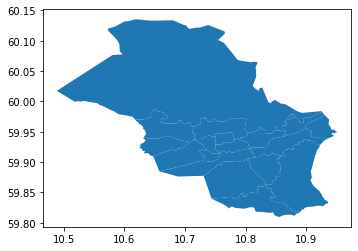

In [10]:
df_geo_raw = gpd.read_file('./data/neighbourhoods.geojson')
df_geo_raw.plot();

In [11]:
df_raw = pd.read_csv('./data/listings.csv', parse_dates=['last_review'])
df_raw.head(3)

C:\Anaconda3\envs\dand\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                         listing_url       scrape_id last_scraped  \
0  42932  https://www.airbnb.com/rooms/42932  20191129104559   2019-11-29   
1  43198  https://www.airbnb.com/rooms/43198  20191129104559   2019-11-29   
2  69964  https://www.airbnb.com/rooms/69964  20191129104559   2019-11-29   

                                  name  \
0  Charming apartment, Oslo Center, Ro   
1  Lovely low budgetroom in nice area!   
2      Lovely flat in Oslo city centre   

                                             summary  \
0                                                NaN   
1  This is a small, bright room, facing our quiet...   
2                                                NaN   

                                               space  \
0  Charming apartment, Oslo Center, Royal House T...   
1  A beautiful intimate bedroom, in an appartment...   
2  Warm, modern flat (410 square feet) in quiet a...   

                                         description experiences_offered  \
0  Charming apartment, Oslo Center, Royal House T...                none   
1  This is a small, bright room, facing our quiet...                none   
2  Warm, modern flat (410 square feet) in quiet a...                none   

                               neighborhood_overview  \
0                                       (URL HIDDEN)   
1  Only five minutes walk from the castle and the...   
2                                                NaN   

                                               notes  \
0                                                NaN   
1  I would prefer one person but can accept two. ...   
2                                                NaN   

                                             transit  \
0                                                NaN   
1  Walking Oslo is quiet possible, really lovely,...   
2                                                NaN   

                                              access  \
0                                     The whole flat   
1  Shared bathroom and well equipped kitchen. Wi-fi.   
2                                                NaN   

                                         interaction  \
0  I will be on phone or mail 24/7 during you sta...   
1                        You will have full privacy.   
2                                                NaN   

                                         house_rules  thumbnail_url  \
0                                   Comment sense :)            NaN   
1  This is our home, and we will respect your pri...            NaN   
2  Please respect your neighbours. Strictly no sm...            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/e84133b1-2...   
1         NaN  https://a0.muscache.com/im/pictures/73523d9a-a...   
2         NaN  https://a0.muscache.com/im/pictures/7072bac6-a...   

   xl_picture_url  host_id                                   host_url  \
0             NaN   187463   https://www.airbnb.com/users/show/187463   
1             NaN  4011871  https://www.airbnb.com/users/show/4011871   
2             NaN   175633   https://www.airbnb.com/users/show/175633   

      host_name  host_since                        host_location  \
0       Cecilie  2010-08-01                   Oslo, Oslo, Norway   
1  Mona Johanne  2012-10-30                   Oslo, Oslo, Norway   
2          Kris  2010-07-21  Berkeley, California, United States   

                                          host_about host_response_time  \
0  Fashion clothing designer,Concept developer 47...     within an hour   
1  We offer a beautiful, spacious room with high ...     within an hour   
2  Photojournalist from Norway/living and working...                NaN   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0               100%                   NaN                 f   
1               100%                   NaN                 t   
2                NaN           

In [12]:
df_cal_raw = pd.read_csv('./data/calendar.csv.gz', compression='gzip')
df_cal_raw.head(3)

listing_id        date available    price adjusted_price  minimum_nights  \
0    13612597  2019-11-29         f  $505.00        $505.00               1   
1    13612597  2019-11-30         f  $505.00        $505.00               1   
2    13612597  2019-12-01         f  $505.00        $505.00               1   

   maximum_nights  
0               6  
1               6  
2               6

The data have been successfully read into dataframes.

In [13]:
df_geo = df_geo_raw.copy()

In [14]:
df = df_raw.copy()

In [15]:
df_cal = df_cal_raw.copy()

### Assess data <a class="anchor" id="assess-data"></a>

First we look at `df_geo`

In [16]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
neighbourhood          17 non-null object
neighbourhood_group    0 non-null object
geometry               17 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 536.0+ bytes


We can see that `df_geo` is a geopandas 'GeoDataFrame'.

There are 17 entries two columns with data, 'neighbourhood' and 'geometry'. Column 'neighbourhood_group' only contains nulls.

In [17]:
df_geo

neighbourhood neighbourhood_group  \
0              Bjerke                None   
1             Frogner                None   
2              Sagene                None   
3         Vestre Aker                None   
4             Sentrum                None   
5              Grorud                None   
6      St. Hanshaugen                None   
7         Nordre Aker                None   
8         Grünerløkka                None   
9          Gamle Oslo                None   
10            Stovner                None   
11             Ullern                None   
12         Nordstrand                None   
13  Søndre Nordstrand                None   
14           Østensjø                None   
15              Marka                None   
16               Alna                None   

                                             geometry  
0   MULTIPOLYGON (((10.78661 59.93823, 10.78860 59...  
1   MULTIPOLYGON (((10.64777 59.90941, 10.67810 59...  
2   MULTIPOLYGON (((10.74832 59.94551, 10.75929 59...  
3   MULTIPOLYGON (((10.61789 59.96986, 10.62984 59...  
4   MULTIPOLYGON (((10.72282 59.91716, 10.72855 59...  
5   MULTIPOLYGON (((10.84833 59.95676, 10.85042 59...  
6   MULTIPOLYGON (((10.71574 59.93626, 10.72009 59...  
7   MULTIPOLYGON (((10.71207 59.94769, 10.71236 59...  
8   MULTIPOLYGON (((10.74873 59.92033, 10.75124 59...  
9   MULTIPOLYGON (((10.65808 59.88441, 10.68243 59...  
10  MULTIPOLYGON (((10.89903 59.95964, 10.90356 59...  
11  MULTIPOLYGON (((10.62538 59.92701, 10.62563 59...  
12  MULTIPOLYGON (((10.73101 59.87718, 10.74990 59...  
13  MULTIPOLYGON (((10.74402 59.83928, 10.77763 59...  
14  MULTIPOLYGON (((10.80061 59.90420, 10.80239 59...  
15  MULTIPOLYGON (((10.48917 60.01727, 10.50193 60...  
16  MULTIPOLYGON (((10.80798 59.92224, 10.80965 59...

The 'geometry' column contains multipolygon coordinates, ie. the coordinates necessary to draw the shape of each neighbourhood and form some sort of map of Oslo.

Next we look at `df`, which is our "main" DataFrame containing listings data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Columns: 106 entries, id to reviews_per_month
dtypes: datetime64[ns](1), float64(25), int64(21), object(59)
memory usage: 7.0+ MB


There are 8,604 entries and 106 columns.

One column has data type 'datetime', and there are 25 float, 21 int and 59 string.

Let's look at the one with **date_time**:

In [19]:
df.describe(include='datetime')

last_review
count                  6829
unique                 1222
top     2019-11-24 00:00:00
freq                    143
first   2013-05-18 00:00:00
last    2019-11-29 00:00:00

This gives a indication of time range: May 2013 - November 2019 (based on the 'last_review' values)

We look at the description of **numeric** variables. As we know, there are many; 25 float and 21 integer.

In [20]:
df.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  8.604000e+03  8.604000e+03            0.0         0.0             0.0   
mean   2.086794e+07  2.019113e+13            NaN         NaN             NaN   
std    1.079553e+07  0.000000e+00            NaN         NaN             NaN   
min    4.293200e+04  2.019113e+13            NaN         NaN             NaN   
25%    1.290353e+07  2.019113e+13            NaN         NaN             NaN   
50%    1.981846e+07  2.019113e+13            NaN         NaN             NaN   
75%    2.985227e+07  2.019113e+13            NaN         NaN             NaN   
max    4.044807e+07  2.019113e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  8.604000e+03                   0.0          8597.000000   
mean   7.021649e+07                   NaN             1.715947   
std    7.127228e+07                   NaN             2.733305   
min    2.755400e+04                   NaN             0.000000   
25%    1.735203e+07                   NaN             1.000000   
50%    4.498351e+07                   NaN             1.000000   
75%    9.627341e+07                   NaN             2.000000   
max    3.125356e+08                   NaN            41.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                8597.000000                           0.0  8604.000000   
mean                    1.715947                           NaN    59.921652   
std                     2.733305                           NaN     0.018291   
min                     0.000000                           NaN    59.818150   
25%                     1.000000                           NaN    59.913938   
50%                     1.000000                           NaN    59.922875   
75%                     2.000000                           NaN    59.930170   
max                    41.000000                           NaN    60.036680   

         longitude  accommodates    bathrooms     bedrooms         beds  \
count  8604.000000   8604.000000  8601.000000  8599.000000  8590.000000   
mean     10.756251      3.259995     1.094873     1.413885     1.904424   
std       0.038040      1.660944     0.313659     0.880904     1.334956   
min      10.623810      1.000000     0.000000     0.000000     0.000000   
25%      10.734578      2.000000     1.000000     1.000000     1.000000   
50%      10.760690      3.000000     1.000000     1.000000     2.000000   
75%      10.774213      4.000000     1.000000     2.000000     2.000000   
max      10.944150     16.000000     5.500000     9.000000    16.000000   

       square_feet  guests_included  minimum_nights  maximum_nights  \
count    50.000000      8604.000000     8604.000000     8604.000000   
mean    462.820000         1.459205        4.265690      608.380637   
std     365.170672         0.905938       18.370528      555.254874   
min       0.000000         1.000000        1.000000        1.000000   
25%      79.500000         1.000000        2.000000       20.000000   
50%     538.000000         1.000000        2.000000     1125.000000   
75%     686.500000         2.000000        3.000000     1125.000000   
max    1238.000000        10.000000     1000.000000    10000.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             8604.000000             8604.000000             8604.000000   
mean                 4.228266                4.601232              618.064389   
std                 18.358037               21.225646              554.791703   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                2.000000               21.000000   
50%                  2.000000                2.000000             1125.000000   
75%                  3.000000                4.000000             1125.000000   
max               1000.00

Some notes on min/max ranges (inclusive): 
- 'host_listings_count' ranges from 0 to 41. (mean: 1.73)
- 'accommodates' from 1 to 16. (mean: 3.25)
- 'bathrooms' from 0 to 5.5. (mean: 1.09)
- 'bedrooms' from 0 to 9. (mean: 1.41)
- 'beds' from 0 to 16. (mean: 1.89)
- 'square_feet' from 0 to 1238 (mean: 463)
- 'minimum_nights' from 1 to 1000 (mean: 4.25) <- Possible outlier on the max value 
- 'number_of_reviews' from 0 to 809 (mean: 18) <- Next column 'number_of_reviews_ltm' not sure what it means
- 'review_scores_rating' from 20 to 100 (mean: 95.7)
- 'review_scores_accuracy' from 2 to 10 (mean: 9.75)
- 'review_scores_cleanliness' from 2 to 10 (mean: 9.52)
- 'review_scores_checkin' from 2 to 10 (mean: 9.77)
- 'review_scores_communication' from 2 to 10 (mean: 9.85)
- 'review_scores_location' from 2 to 10 (mean: 9.71)
- 'review_scores_value' from 2 to 10 (mean: 9.60)

We note that 'review_scores_rating' only has values for 6653 out of 8604 listings. Pretty much the same is the case for the other review scores subcategory ratings.

We also note there are seven columns having nothing but nan values.

We take a closer look at the review scores related variables.

In [21]:
df[df.review_scores_rating.isna() == True].head()

id                          listing_url       scrape_id last_scraped  \
23  331352  https://www.airbnb.com/rooms/331352  20191129104559   2019-11-29   
29  422607  https://www.airbnb.com/rooms/422607  20191129104559   2019-11-29   
32  462347  https://www.airbnb.com/rooms/462347  20191129104559   2019-11-29   
42  580690  https://www.airbnb.com/rooms/580690  20191129104559   2019-11-29   
45  588444  https://www.airbnb.com/rooms/588444  20191129104559   2019-11-29   

                                     name  \
23                           Central Oslo   
29     Lovely Apt w garden in city centre   
32  Spacious MIDDLE of Oslo with balcony!   
42                     A home with a view   
45     Great location, central and clean!   

                                              summary  \
23                                                NaN   
29  Beautiful 1bdr apt w private garden located in...   
32  My apartment is situated within 2 to 5 minutes...   
42  Nice home with a fantastic sea view and a larg...   
45                                                NaN   

                                                space  \
23  Bohemic, but quiet, nice and clean. Situated b...   
29  The whole apt has been newly renovated last ye...   
32  Lovely light and spacious apartment with south...   
42  If you`d like to stay in Oslo for a while, rel...   
45  Comfy room for one or more nights!  Very centr...   

                                          description experiences_offered  \
23  Bohemic, but quiet, nice and clean. Situated b...                none   
29  Beautiful 1bdr apt w private garden located in...                none   
32  My apartment is situated within 2 to 5 minutes...                none   
42  Nice home with a fantastic sea view and a larg...                none   
45  Comfy room for one or more nights!  Very centr...                none   

                                neighborhood_overview  \
23                 Most vibrant neighborhood in Oslo.   
29  Safe great neighbourhood with everything you n...   
32  Everywhere in Oslo is close and walkable from ...   
42                                                NaN   
45                                                NaN   

                                                notes  \
23                                                NaN   
29  Always remember to lock garden doors and all w...   
32                                                NaN   
42                                                NaN   
45                                                NaN   

                                              transit  \
23  Very easy access to all public transport, 10 m...   
29  Buses that take you wherever you need to go, t...   
32  very close to Stortingent T Bane station and 3...   
42                                                NaN   
45                                                NaN   

                                               access  \
23                Guest room, kitchen for quick meals   
29  No access to big closet, but you will have spa...   
32                               All of the apartment   
42                                                NaN   
45                                                NaN   

                                          interaction  \
23                                                NaN   
29  I am avialable throughout your stay for any qu...   
32  I will be available by phone and my neighbour ...   
42                                                NaN   
45                                                NaN   

                                          house_rules  thumbnail_url  \
23  No parties in-house please, the citylife outsi...            NaN   
29  No loud parties, but you can play music and fe...            NaN   
32                                                NaN            NaN   
42                   No animals. Strictly no smoking.            NaN   
45                              

Scrolling pretty far to the right will show the review scores related variables.

Whenever 'review_scores_rating' is missing, the other review scores related variables are missing as well. The missing data should be dropped, given that these are key variables. Also, it could indicate that the listing was not rented, and hence, the price would be hypothetical.

Let's have a closer look at 'minimum_nights' as well:

In [22]:
df.minimum_nights.value_counts()

2       2913
1       2075
3       1510
4        600
5        537
7        361
6        169
10        85
30        83
14        75
15        22
8         21
20        19
21        17
60        13
25        12
90         9
12         7
13         7
50         7
100        7
28         6
16         5
365        4
31         4
27         4
9          3
180        3
19         2
200        2
23         2
500        2
56         1
40         1
80         1
32         1
1000       1
111        1
61         1
322        1
41         1
89         1
18         1
45         1
150        1
110        1
279        1
44         1
29         1
407        1
Name: minimum_nights, dtype: int64

Ok, most are less than a week. They high values of 500 and 1000 are rare. This variable could be made categorical with ranges.

Now, let us look at the columns in `df` of type string:

In [23]:
df.describe(include='object')

listing_url last_scraped  \
count                                    8604         8604   
unique                                   8604            1   
top     https://www.airbnb.com/rooms/17530539   2019-11-29   
freq                                        1         8604   

                                                name  \
count                                           8584   
unique                                          8327   
top     Urban Apartments Grünerløkka Spacious Studio   
freq                                              10   

                                                  summary  \
count                                                8324   
unique                                               8158   
top     In our beautiful fully equipped studio apartme...   
freq                                                    7   

                                                    space  \
count                                                5162   
unique                                               4975   
top     Urban Apartments ligger i byens hippeste bydel...   
freq                                                   17   

                                              description experiences_offered  \
count                                                8431                8604   
unique                                               8332                   1   
top     Modern room with double bed close to Majorstue...                none   
freq                                                    7                8604   

                                    neighborhood_overview  \
count                                                4911   
unique                                               4633   
top     The villa is located in a quiet villa neighbor...   
freq                                                   14   

                                                    notes  \
count                                                2456   
unique                                               2321   
top     The listing is run as a small self service hos...   
freq                                                   17   

                                                  transit  \
count                                                5430   
unique                                               5141   
top     Ruter is the name of the public transport prov...   
freq                                                   36   

                     access                interaction        house_rules  \
count                  4113                       4325               5126   
unique                 3761                       4033               4678   
top     The whole apartment  Contact us through Airbnb  - No shoes inside   
freq                     28                         23                 33   

                                              picture_url  \
count                                                8604   
unique                                               8483   
top     https://a0.muscache.com/im/pictures/effa7ae3-f...   
freq                                                    8   

                                           host_url host_name  host_since  \
count                                          8604      8597        8597   
unique                                         7549      2881        2468   
top     https://www.airbnb.com/users/show/233933220    Martin  2019-01-02   
freq                                             33        60          33   

             host_location                                         host_about  \
count                 8565                                               4220   
unique                 287                                               3526   
top     Oslo, Oslo, Norway  Urban Apartments er et selskap som tilbyr kort...   
freq                  7095                                                 33   

       host_response_t

Observations:
- 'last_scraped' should have been datetime, but we will drop it later, as it only has 1 unique value '2019-11-29'.
- 'host_since' should have been datetime - could be converted to a numerical 'host_since_year'
- 'neighbourhood_cleansed' sounds like it could be better to use than 'neighbourhood'
- 'host_is_super_host', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification' should be boolean, indicated by 't' and 'f' strings.
- 'amenities' are listed, this info should be extracted
- Price columns should be numerical: 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- Columns 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type' should be categorical type.

Property type has 22 different categories.

In [24]:
df.property_type.value_counts()

Apartment             6873
Condominium            853
House                  411
Loft                   165
Townhouse              148
Serviced apartment      39
Villa                   28
Guest suite             25
Guesthouse              12
Boat                    10
Other                    9
Cabin                    7
Bed and breakfast        5
Camper/RV                5
Tiny house               4
Tent                     3
Farm stay                2
Hostel                   1
Houseboat                1
Vacation home            1
Chalet                   1
Dome house               1
Name: property_type, dtype: int64

The following can be called 'House': 
- 'Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 'Farm stay', 'Dome house'

And the following can be called 'Apartment':
- 'Condominium', 'Loft', 'Serviced Apartment', 'Guest suite', 'Bed and breakfast'

The rest can be 'Other':
- 'Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel'

Now, let's look if there are other columns in `df` that we do not need, or wouldn't know how to use in a model:

In [25]:
df.head(3)

id                         listing_url       scrape_id last_scraped  \
0  42932  https://www.airbnb.com/rooms/42932  20191129104559   2019-11-29   
1  43198  https://www.airbnb.com/rooms/43198  20191129104559   2019-11-29   
2  69964  https://www.airbnb.com/rooms/69964  20191129104559   2019-11-29   

                                  name  \
0  Charming apartment, Oslo Center, Ro   
1  Lovely low budgetroom in nice area!   
2      Lovely flat in Oslo city centre   

                                             summary  \
0                                                NaN   
1  This is a small, bright room, facing our quiet...   
2                                                NaN   

                                               space  \
0  Charming apartment, Oslo Center, Royal House T...   
1  A beautiful intimate bedroom, in an appartment...   
2  Warm, modern flat (410 square feet) in quiet a...   

                                         description experiences_offered  \
0  Charming apartment, Oslo Center, Royal House T...                none   
1  This is a small, bright room, facing our quiet...                none   
2  Warm, modern flat (410 square feet) in quiet a...                none   

                               neighborhood_overview  \
0                                       (URL HIDDEN)   
1  Only five minutes walk from the castle and the...   
2                                                NaN   

                                               notes  \
0                                                NaN   
1  I would prefer one person but can accept two. ...   
2                                                NaN   

                                             transit  \
0                                                NaN   
1  Walking Oslo is quiet possible, really lovely,...   
2                                                NaN   

                                              access  \
0                                     The whole flat   
1  Shared bathroom and well equipped kitchen. Wi-fi.   
2                                                NaN   

                                         interaction  \
0  I will be on phone or mail 24/7 during you sta...   
1                        You will have full privacy.   
2                                                NaN   

                                         house_rules  thumbnail_url  \
0                                   Comment sense :)            NaN   
1  This is our home, and we will respect your pri...            NaN   
2  Please respect your neighbours. Strictly no sm...            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/e84133b1-2...   
1         NaN  https://a0.muscache.com/im/pictures/73523d9a-a...   
2         NaN  https://a0.muscache.com/im/pictures/7072bac6-a...   

   xl_picture_url  host_id                                   host_url  \
0             NaN   187463   https://www.airbnb.com/users/show/187463   
1             NaN  4011871  https://www.airbnb.com/users/show/4011871   
2             NaN   175633   https://www.airbnb.com/users/show/175633   

      host_name  host_since                        host_location  \
0       Cecilie  2010-08-01                   Oslo, Oslo, Norway   
1  Mona Johanne  2012-10-30                   Oslo, Oslo, Norway   
2          Kris  2010-07-21  Berkeley, California, United States   

                                          host_about host_response_time  \
0  Fashion clothing designer,Concept developer 47...     within an hour   
1  We offer a beautiful, spacious room with high ...     within an hour   
2  Photojournalist from Norway/living and working...                NaN   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0               100%                   NaN                 f   
1               100%                   NaN                 t   
2                NaN           

In [26]:
# There are quite a few that we do not need or I wouldn't know how to use in a model

cols_not_needed = ['listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                   'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 
                   'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                   'host_neighbourhood', 'host_listings_count', 'host_verifications', 
                   'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location', 'bed_type', 'weekly_price', 'monthly_price',
                   'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 
                   'availability_90', 'availability_365', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# In addition we notice there are two more columns that should be datetype. Perhaps combined to a number of days delta.
dt_cols = ['first_review', 'last_review']

Closer look at amenities

In [27]:
df.amenities.sample(10)

3661    {TV,"Cable TV",Internet,Kitchen,"Free parking ...
3896    {TV,"Cable TV",Wifi,Kitchen,Elevator,"Buzzer/w...
8220    {TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer...
2769    {TV,Internet,Wifi,Kitchen,"Paid parking off pr...
8117    {Wifi,Kitchen,Heating,Washer,Dryer,"Smoke dete...
8422    {TV,Internet,Wifi,Kitchen,Elevator,Heating,"Fa...
2952    {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
6072    {TV,Wifi,Kitchen,Elevator,"Free street parking...
4826    {Wifi,Kitchen,"Paid parking off premises","Ind...
4896    {TV,Wifi,Kitchen,Heating,Washer,Iron,"Laptop f...
Name: amenities, dtype: object

In [28]:
df2 = df.copy()

In [29]:
# we remove some not needed characters
df2['amenities'] = df2['amenities'].str.replace('"', '')
df2['amenities'] = df2['amenities'].str.replace('{', '')
df2['amenities'] = df2['amenities'].str.replace('}', '')

In [30]:
df2.amenities.sample(5)

2762    TV,Wifi,Kitchen,Buzzer/wireless intercom,Heati...
3238    TV,Wifi,Kitchen,Elevator,Suitable for events,W...
658     TV,Cable TV,Internet,Wifi,Kitchen,Pets live on...
7545    TV,Cable TV,Wifi,Kitchen,Heating,Washer,Dryer,...
1318    TV,Internet,Wifi,Kitchen,Free parking on premi...
Name: amenities, dtype: object

In [31]:
df3 = pd.DataFrame(columns=['id', 'amenity'])
d_list = []

for index, row in df2.iterrows():
    for value in str(row['amenities']).split(','):
        d_list.append({'id':row['id'], 
                       'value':value})
df3 = df3.append(d_list, ignore_index=True, sort=True)
df3 = df3.groupby('id')['value'].value_counts()
df3 = df3.unstack(level=-1).fillna(0)

In [32]:
df3.head()

value        toilet  24-hour check-in  Accessible-height bed  \
id                                                             
42932  0.0      1.0               0.0                    1.0   
43198  0.0      0.0               0.0                    0.0   
69964  0.0      0.0               0.0                    0.0   
71725  0.0      0.0               0.0                    0.0   
77108  0.0      0.0               0.0                    0.0   

value  Accessible-height toilet  Air conditioning  BBQ grill  Baby bath  \
id                                                                        
42932                       1.0               0.0        0.0        0.0   
43198                       0.0               0.0        0.0        0.0   
69964                       0.0               0.0        0.0        0.0   
71725                       0.0               0.0        0.0        0.0   
77108                       0.0               0.0        0.0        0.0   

value  Baby monitor  Babysitter recommendations  Balcony  Bath towel  \
id                                                                     
42932           0.0                         0.0      0.0         0.0   
43198           0.0                         0.0      0.0         0.0   
69964           0.0                         0.0      0.0         0.0   
71725           0.0                         0.0      0.0         0.0   
77108           0.0                         0.0      0.0         0.0   

value  Bathroom essentials  Bathtub  Bathtub with bath chair  \
id                                                             
42932                  0.0      1.0                      0.0   
43198                  0.0      0.0                      0.0   
69964                  0.0      0.0                      0.0   
71725                  0.0      0.0                      0.0   
77108                  0.0      0.0                      0.0   

value  Beach essentials  Beachfront  Bed linens  Bedroom comforts  Body soap  \
id                                                                             
42932               0.0         0.0         0.0               0.0        0.0   
43198               0.0         0.0         0.0               0.0        0.0   
69964               0.0         0.0         0.0               0.0        0.0   
71725               0.0         0.0         0.0               0.0        0.0   
77108               0.0         0.0         0.0               0.0        0.0   

value  Breakfast  Breakfast table  Building staff  Buzzer/wireless intercom  \
id                                                                            
42932        0.0              0.0             1.0                       1.0   
43198        0.0              0.0             0.0                       1.0   
69964        0.0              0.0             0.0                       1.0   
71725        0.0              0.0             0.0                       1.0   
77108        0.0              0.0             0.0                       1.0   

value  Cable TV  Carbon monoxide detector  Cat(s)  Ceiling fan  Ceiling hoist  \
id                                                                              
42932       1.0                       0.0     0.0          0.0            0.0   
43198       0.0                       0.0     1.0          0.0            0.0   
69964       1.0                       0.0     0.0          0.0            0.0   
71725       0.0                       0.0     0.0          0.0            0.0   
77108       1.0                       0.0     0.0          0.0            0.0   

value  Changing table  Children’s books and toys  Children’s dinnerware  \
id                                                                        
42932             0.0                        0.0                    0.0   
43198             0.0                        0.0                    0.0   
69964             0.0                        0.0                    0.0   
71725        

In [33]:
df3.sum().sort_values(ascending=False)

value
Wifi                                          8392.0
Kitchen                                       8372.0
Heating                                       8187.0
Essentials                                    8139.0
Smoke detector                                8051.0
Washer                                        7611.0
Fire extinguisher                             7461.0
TV                                            6663.0
Hangers                                       6127.0
Iron                                          5664.0
Laptop friendly workspace                     5451.0
Hair dryer                                    5279.0
Shampoo                                       5009.0
Hot water                                     4248.0
Family/kid friendly                           3547.0
Dryer                                         3532.0
Refrigerator                                  3019.0
Cable TV                                      3012.0
Dishes and silverware                   

In [34]:
common_amenities = list(df3.sum().sort_values(ascending=False).index[:10])
common_amenities

['Wifi',
 'Kitchen',
 'Heating',
 'Essentials',
 'Smoke detector',
 'Washer',
 'Fire extinguisher',
 'TV',
 'Hangers',
 'Iron']

In [35]:
handpicked_amenities = ['Elevator', 'Bed linens', 'Indoor fireplace', 'Free parking on premises', 
                        'Lock on bedroom door', 'Patio or balcony', 'Garden or backyard',
                        'BBQ grill', 'Smart lock', 'Breakfast', 'Air conditioning',
                        'Gym', 'Pool']

In [36]:
wanted_amenities = common_amenities + handpicked_amenities

In [37]:
df3 = df3[wanted_amenities]

In [38]:
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '')

In [39]:
df3.head()

value  wifi  kitchen  heating  essentials  smoke_detector  washer  \
id                                                                  
42932   1.0      1.0      1.0         1.0             1.0     1.0   
43198   1.0      1.0      1.0         0.0             1.0     0.0   
69964   1.0      1.0      1.0         0.0             1.0     1.0   
71725   1.0      1.0      1.0         1.0             0.0     1.0   
77108   1.0      1.0      1.0         1.0             1.0     1.0   

value  fire_extinguisher   tv  hangers  iron  elevator  bed_linens  \
id                                                                   
42932                1.0  1.0      1.0   1.0       0.0         0.0   
43198                1.0  0.0      1.0   1.0       0.0         0.0   
69964                0.0  1.0      0.0   0.0       0.0         0.0   
71725                0.0  1.0      0.0   0.0       1.0         0.0   
77108                1.0  1.0      1.0   1.0       0.0         0.0   

value  indoor_fireplace  free_parking_on_premises  lock_on_bedroom_door  \
id                                                                        
42932               0.0                       0.0                   0.0   
43198               0.0                       0.0                   0.0   
69964               0.0                       0.0                   0.0   
71725               0.0                       0.0                   0.0   
77108               1.0                       0.0                   0.0   

value  patio_or_balcony  garden_or_backyard  bbq_grill  smart_lock  breakfast  \
id                                                                              
42932               0.0                 0.0        0.0         0.0        0.0   
43198               0.0                 0.0        0.0         0.0        0.0   
69964               0.0                 0.0        0.0         0.0        0.0   
71725               0.0                 0.0        0.0         0.0        0.0   
77108               0.0                 0.0        0.0         0.0        0.0   

value  air_conditioning  gym  pool  
id                                  
42932               0.0  0.0   0.0  
43198               0.0  0.0   0.0  
69964               0.0  0.0   0.0  
71725               0.0  0.0   0.0  
77108               0.0  0.0   0.0

We will later add `df3` columns to `df` 

Lastly, we look at `df_cal`

In [40]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140460 entries, 0 to 3140459
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 167.7+ MB


There are 3.1 million entries and 7 columns. Let's look at the top rows.

In [41]:
df_cal.sample(5)

listing_id        date available      price adjusted_price  \
2585422    33678817  2020-07-13         f    $650.00        $650.00   
1662699    21180785  2020-07-22         f    $245.00        $245.00   
731944     12100083  2020-07-05         t  $1,200.00      $1,200.00   
1757170    22197043  2020-01-10         f    $598.00        $598.00   
1329822    18265673  2020-01-10         t    $340.00        $340.00   

         minimum_nights  maximum_nights  
2585422               2              30  
1662699               1               7  
731944                6              30  
1757170               1              90  
1329822               1              10

Ok, so here we can see per calendar 'date' whether a listing was 'available', price, minimum and maximum nights.

Observations:
- 'date' should be of type 'datetime'
- 'available' should be of type boolean.
- 'price' and 'adjusted_price' should be of type float.

In [42]:
df_cal.notna().sum()

listing_id        3140460
date              3140460
available         3140460
price             3139361
adjusted_price    3139361
minimum_nights    3140460
maximum_nights    3140460
dtype: int64

We do not have many missing values, just a few for 'price' and 'adjusted price'.

### Assessment Summary

1) The data were overall tidy.

2) Some dirtiness observed though:

MISC

- Columns with no variation in values
- Columns with nan values only (or close to it)
- All the columns in the list 'cols_not_needed'

NON-LOGICAL DATA TYPES

- String columns `df`: 'first_review', 'last_review' (list: dt_cols) should be datetime and possibly dropped if we want to look at the numeric delta (number of days)
- String columns `df`: 'last_scraped' should have been datetime, but we will drop it later, as it only has 1 unique value '2019-11-29'.
- String columns `df`: 'host_since' should have been datetime - should perhaps be converted to a numerical 'host_since_year'
- String columns `df`: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification' should be boolean, indicated by 't' and 'f' strings, should be 0/1.
- String columns `df`: 'amenities' are listed in a single column, the key info should be extracted by adding `df3` columns to `df`.
- String columns `df`: Price columns should be numerical: 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- String columns `df`: Missing values in 'security_deposit' and 'cleaning_fee' should be set to 0 (zero).
- String columns `df`: Columns 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type', 'minimum_nights' should be categorical type.
- String columns `df`: Whenever 'review_scores_rating' is missing, the other review scores related variables are missing as well. The missing data should be dropped, given that these are key variables. Also, it could indicate that the listing was not rented, and hence, the price would be hypothetical.
- String columns `df_cal`: 'date' should be of type 'datetime'
- String columns `df_cal`: 'available' should be of type boolean.
- String columns `df_cal`: 'price' and 'adjusted_price' should be of type float.


OUTLIERS
- In `df` consider dropping rows where 'price' divided by 'guests_included' is under 50 or over 3000 (for instance).

## Data Preparation <a class="anchor" id="data-preparation"></a>

### Data cleaning approach <a class="anchor" id="data-cleaning"></a>

We will use a 3 step process for data cleaning:
1. Define
2. Clean
3. Test

### Clean data <a class="anchor" id="clean-data"></a>

We will require some data cleaning based on the assessment:

REMOVE COLUMNS
- Remove columns with no variation in values - `df`, `df_geo`
- Remove columns with 99% or more nan values - `df`, `df_geo`
- Remove all the columns in the list 'cols_not_needed'

FIX NON-LOGICAL DATA TYPES
- In `df` convert 'first_review' and 'last_review' (list: dt_cols) to type 'datetime', extract the delta in new column 'review_range_days' and drop the original columns
- In `df` convert 'host_since' to type 'datetime' and then to integer type in a new column 'host_since_year'. Drop 'host_since'.
- In `df` convert (t/f) columns to type boolean: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'.
- In `df` convert longitude/latitude to a new column 'hot_sectors' based on the most popular areas in "grid".
- In `df` extract strings from 'amenities' column for each amenity and place in separate columns as boolean. Only keep the what seems relevant (add what is in `df3` columns to `df`).
- In `df` convert Price columns to type 'float': 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- In `df` missing values in 'security_deposit' and 'cleaning_fee' should be set to 0 (zero).
- In `df` convert 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type', 'minimum_nights' to type 'categorical'.
- In `df` drop all entries where 'review_scores_rating' is missing.
- In `df_cal` convert 'date' to type 'datetime'.
- In `df_cal` convert 'available' to type boolean.
- In `df_cal` convert 'price' and 'adjusted_price' to type 'float'.


REMOVE OUTLIERS
- In `df` drop rows where 'price' divided by 'guests_included' is under 50 or over 3000.

To address the first two items
    1. Defined

- Remove columns with no variation in values - in `df`, `df_geo`
- Remove columns with 99% or more nan values - `df`, `df_geo`

We write a custom function `df_cleaning()` for this task.

In [43]:
def df_cleaning(df, nan_threshold):
    '''
    The function will take a pandas dataframe, remove some of its columns 
    based on below listed criteria and return a (cleaner) dataframe.
    
    To be removed
    - Columns with no variation in values
    - Columns with more nan values than the "nan_threshold" input
    
    INPUT
    
    df - Pandas DataFrame
    
    nan_treshold - the minimum ratio of nan values before column gets removed. 
    
                   Example: A nan_threshold of 0.9 means that columns having more than 90 percent
                            nan values will be removed
    
    OUTPUT
    
    cleaned_df - Pandas DataFrame where columns have been removed based on above listed criteria
    
    '''
    # list of colomn names for columns with no variability among the data points
    non_var_cols = list(df.loc[:, df.nunique() <= 1].nunique().index)
    
    # list of colomn names for columns with nan_threshold surpassed
    mostly_nan_cols = list(df.loc[:, df.isna().sum() > df.shape[0]*nan_threshold].nunique().index)
    
    # combine the two lists in one list, ensuring no duplicate column names
    cols_to_drop = list(set(mostly_nan_cols + non_var_cols))
    
    # drop the columns based on the 'cols_to_drop' list
    cleaned_df = df.drop(columns=cols_to_drop)
    
    print("{} columns removed:".format(len(cols_to_drop)))
    print(cols_to_drop)
    
    return cleaned_df

    2. Clean 

In [44]:
df = df_cleaning(df, 0.99)

17 columns removed:
['xl_picture_url', 'square_feet', 'medium_url', 'experiences_offered', 'jurisdiction_names', 'requires_license', 'is_business_travel_ready', 'license', 'calendar_last_scraped', 'neighbourhood_group_cleansed', 'thumbnail_url', 'host_acceptance_rate', 'country_code', 'has_availability', 'country', 'scrape_id', 'last_scraped']


In [45]:
df_geo = df_cleaning(df_geo, 0.99)

1 columns removed:
['neighbourhood_group']


    3. Test

In [46]:
print(df.shape, df_geo.shape)

(8604, 89) (17, 2)


The columns have indeed been removed.

    1. Define
- Remove all the columns in the list 'cols_not_needed'

    2. Clean

In [47]:
print(len(cols_not_needed))

48


In [48]:
cols_not_needed

['listing_url',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_verifications',
 'street',
 'neighbourhood',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'bed_type',
 'weekly_price',
 'monthly_price',
 'extra_people',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [49]:
df.drop(columns=cols_not_needed, inplace=True)

    3. Test

In [50]:
df.shape

(8604, 41)

Good. More than half of the columns were dropped, as expected.

    1. Define

- In `df` convert 'first_review' and 'last_review' (list: dt_cols) to type 'datetime', extract the delta in new column 'review_range_days' and drop the original columns

    2. Clean

In [51]:
for col in dt_cols:
    df[col] = pd.to_datetime(df[col]).dt.year


df['review_range_days'] = df['last_review'] - df['first_review']

    3. Test

In [52]:
df.review_range_days.value_counts()

0.0    3414
1.0    1572
2.0     827
3.0     571
4.0     252
5.0     133
6.0      35
7.0      19
8.0       6
Name: review_range_days, dtype: int64

Good.

    1. Define

- In `df` convert 'host_since' to type 'datetime' and then to numeric type in a new column 'host_since_year'. Drop 'host_since'.

    2. Clean

In [53]:
df['host_since_year'] = pd.to_datetime(df['host_since']).dt.year

In [54]:
df.drop(columns=['host_since'], inplace=True)

    3. Test

In [55]:
df.shape

(8604, 42)

In [56]:
df.host_since_year.dtypes

dtype('float64')

In [57]:
df.host_since_year.value_counts()

2016.0    1975
2015.0    1813
2014.0    1503
2017.0     902
2013.0     797
2018.0     550
2019.0     474
2012.0     396
2011.0     148
2010.0      37
2009.0       2
Name: host_since_year, dtype: int64

Numeric column 'host_since_year' successfully created.

    1. Define
- In `df` convert (t/f) columns to type boolean: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'.

    2. Clean

In [58]:
tf_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 
           'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

binary_mapping = {'f': 0, 't': 1}

df[tf_cols] = df[tf_cols].apply(lambda x: x.map(binary_mapping))

    3. Test

In [59]:
df[tf_cols].head()

host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                0.0                   1.0                     0.0   
1                1.0                   1.0                     0.0   
2                0.0                   1.0                     0.0   
3                0.0                   1.0                     1.0   
4                0.0                   1.0                     1.0   

   is_location_exact  instant_bookable  require_guest_profile_picture  \
0                  0                 1                              0   
1                  1                 1                              0   
2                  1                 0                              0   
3                  1                 0                              0   
4                  0                 0                              0   

   require_guest_phone_verification  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [60]:
df[tf_cols].nunique()

host_is_superhost                   2
host_has_profile_pic                2
host_identity_verified              2
is_location_exact                   2
instant_bookable                    2
require_guest_profile_picture       2
require_guest_phone_verification    2
dtype: int64

Looks good.

    1. Define
    
 - In `df` convert longitude/latitude to a new column 'hot_sectors' based on the most popular areas in "grid".

    2. Clean

In [61]:
step = 0.025
to_bin = lambda x: np.floor(x / step) * step

df["latbin"] = df.latitude.map(to_bin)
df["lonbin"] = df.longitude.map(to_bin)


In [62]:
df["latbin"] = np.round(df["latbin"], 3).astype('str')
df["lonbin"] = np.round(df["lonbin"], 3).astype('str')
df["hot_sectors"] = df["latbin"] + "_" + df["lonbin"]

In [63]:
hot_sector_list = list(df["hot_sectors"].value_counts().index[:8])

data_len = len(df["hot_sectors"])

df['hot_sectors'] = np.where(df['hot_sectors'].isin(hot_sector_list), df['hot_sectors'], 'not_hot')
print(df['hot_sectors'])   

0           59.9_10.7
1           59.9_10.7
2        59.925_10.75
3         59.9_10.775
4           59.9_10.7
            ...      
8599       59.9_10.75
8600          not_hot
8601          not_hot
8602    59.925_10.775
8603    59.925_10.775
Name: hot_sectors, Length: 8604, dtype: object


    3. Test

In [64]:
df['hot_sectors'].value_counts()

59.9_10.75       1928
59.925_10.75     1494
not_hot          1480
59.9_10.725       764
59.9_10.775       714
59.9_10.7         699
59.925_10.725     655
59.925_10.775     440
59.925_10.7       430
Name: hot_sectors, dtype: int64

OK.

    1. Define
    
- In `df` extract strings from 'amenities' column for each amenity and place in separate columns as boolean. Only keep the what seems relevant (add what is in `df3` columns to `df`).

    2. Clean

In [65]:
df3

value     wifi  kitchen  heating  essentials  smoke_detector  washer  \
id                                                                     
42932      1.0      1.0      1.0         1.0             1.0     1.0   
43198      1.0      1.0      1.0         0.0             1.0     0.0   
69964      1.0      1.0      1.0         0.0             1.0     1.0   
71725      1.0      1.0      1.0         1.0             0.0     1.0   
77108      1.0      1.0      1.0         1.0             1.0     1.0   
...        ...      ...      ...         ...             ...     ...   
40425317   1.0      1.0      1.0         1.0             1.0     0.0   
40426245   1.0      1.0      1.0         0.0             0.0     1.0   
40426743   1.0      1.0      1.0         1.0             1.0     1.0   
40437519   1.0      1.0      1.0         1.0             0.0     1.0   
40448069   1.0      1.0      1.0         1.0             1.0     1.0   

value     fire_extinguisher   tv  hangers  iron  elevator  bed_linens  \
id                                                                      
42932                   1.0  1.0      1.0   1.0       0.0         0.0   
43198                   1.0  0.0      1.0   1.0       0.0         0.0   
69964                   0.0  1.0      0.0   0.0       0.0         0.0   
71725                   0.0  1.0      0.0   0.0       1.0         0.0   
77108                   1.0  1.0      1.0   1.0       0.0         0.0   
...                     ...  ...      ...   ...       ...         ...   
40425317                1.0  1.0      1.0   0.0       0.0         0.0   
40426245                0.0  1.0      0.0   0.0       0.0         0.0   
40426743                1.0  1.0      0.0   1.0       0.0         1.0   
40437519                1.0  1.0      0.0   1.0       1.0         0.0   
40448069                1.0  1.0      0.0   1.0       1.0         0.0   

value     indoor_fireplace  free_parking_on_premises  lock_on_bedroom_door  \
id                                                                           
42932                  0.0                       0.0                   0.0   
43198                  0.0                       0.0                   0.0   
69964                  0.0                       0.0                   0.0   
71725                  0.0                       0.0                   0.0   
77108                  1.0                       0.0                   0.0   
...                    ...                       ...                   ...   
40425317               1.0                       0.0                   0.0   
40426245               0.0                       1.0                   0.0   
40426743               1.0                       1.0                   0.0   
40437519               0.0                       0.0                   0.0   
40448069               0.0                       1.0                   0.0   

value     patio_or_balcony  garden_or_backyard  bbq_grill  smart_lock  \
id                                                                      
42932                  0.0                 0.0        0.0         0.0   
43198                  0.0                 0.0        0.0         0.0   
69964                  0.0                 0.0        0.0         0.0   
71725                  0.0                 0.0        0.0         0.0   
77108                  0.0                 0.0        0.0         0.0   
...                    ...                 ...        ...         ...   
40425317               0.0                 0.0        0.0         0.0   
40426245               0.0                 0.0        0.0         0.0   
40426743               1.0                 1.0        1.0         0.0   
40437519               0.0                 0.0        0.0         0.0   
40448069               0.0                 0.0        0.0         0.0   

value     breakfast  air_conditioning  gym  pool  
id                                                
42932           0.0               0.0  0.0   0

In [66]:
df = df.join(df3, on='id')

    3. Test

In [67]:
df.head()

id host_response_time host_response_rate  host_is_superhost  \
0  42932     within an hour               100%                0.0   
1  43198     within an hour               100%                1.0   
2  69964                NaN                NaN                0.0   
3  71725       within a day               100%                0.0   
4  77108       within a day                75%                0.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                   1.0                     0.0   
1                        2.0                   1.0                     0.0   
2                        2.0                   1.0                     0.0   
3                        1.0                   1.0                     1.0   
4                        1.0                   1.0                     1.0   

  neighbourhood_cleansed  latitude  longitude  is_location_exact  \
0                Frogner  59.91234   10.72384                  0   
1                Frogner  59.91839   10.71457                  1   
2                 Sagene  59.93898   10.77360                  1   
3             Gamle Oslo  59.90611   10.78000                  1   
4                Frogner  59.92478   10.71649                  0   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             3        1.0       2.0   3.0   
1     Apartment     Private room             3        0.5       1.0   1.0   
2     Apartment  Entire home/apt             3        1.0       1.0   1.0   
3     Apartment     Private room             3        1.0       1.0   2.0   
4     Apartment  Entire home/apt             8        1.5       3.0   0.0   

                                           amenities      price  \
0  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free str...  $2,000.00   
1  {Wifi,Kitchen,"Pets live on this property",Cat...    $385.00   
2  {TV,"Cable TV",Internet,Wifi,Kitchen,"Pets all...  $1,009.00   
3  {TV,Internet,Wifi,"Wheelchair accessible",Kitc...    $504.00   
4  {TV,"Cable TV",Internet,Wifi,Kitchen,"Indoor f...  $1,917.00   

  security_deposit cleaning_fee  guests_included  minimum_nights  \
0            $0.00      $300.00                3               3   
1            $0.00      $101.00                1               2   
2        $1,834.00      $550.00                2              30   
3              NaN      $252.00                2               4   
4              NaN          NaN                6               7   

   number_of_reviews  number_of_reviews_ltm  first_review  last_review  \
0                 37                      7        2013.0       2019.0   
1                 36                      3        2015.0       2019.0   
2                  7                      0        2011.0       2013.0   
3                 49                      3        2011.0       2019.0   
4                 14                      0        2011.0       2018.0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  97.0                    10.0                       10.0   
1                  97.0                    10.0                       10.0   
2                  94.0                     9.0                        9.0   
3                  95.0                     9.0                       10.0   
4                  98.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                     9.0   
3                   10.0                         10.0                     9.0   
4                   10.0                         10.0                    10.0   

   review_scores_value  instant_booka

The amenties columns were indeed added.

    1. Define
- In `df` convert Price columns to type 'float': 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.

    2. Clean

In [68]:
price_cols = ['price', 'cleaning_fee']

for col in price_cols:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].astype(float)


    3. Test

In [69]:
df[price_cols]

price  cleaning_fee
0     2000.0         300.0
1      385.0         101.0
2     1009.0         550.0
3      504.0         252.0
4     1917.0           NaN
...      ...           ...
8599  1302.0           NaN
8600   550.0           NaN
8601  2504.0         600.0
8602  1798.0         400.0
8603   440.0           NaN

[8604 rows x 2 columns]

This looks fine.

    1. Define
- In `df` convert 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type' and 'minimum_nights' to type 'categorical'.

For 'property_type' the following can be called 'House': 
- 'Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 'Farm stay', 'Dome house'

And the following can be called 'Apartment':
- 'Condominium', 'Loft', 'Serviced Apartment', 'Guest suite', 'Bed and breakfast'

The rest can be 'Other':
- 'Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel'

    2. Clean

In [70]:
cat_type = pd.api.types.CategoricalDtype(['super_strict_30', 'strict_14_with_grace_period', 'moderate', 'flexible'])

df['cancellation_policy'] = df['cancellation_policy'].astype(cat_type)

In [71]:
cat_type = pd.api.types.CategoricalDtype(['not specified', 'a few days or more', 'within a day', 'within a few hours', 
                                          'within an hour'])

df['host_response_time'] = df['host_response_time'].fillna('not specified').astype(cat_type)

In [72]:
house_cols = ['Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 
              'Farm stay', 'Dome house']

apt_cols = ['Condominium', 'Loft', 'Serviced apartment', 'Guest suite', 'Bed and breakfast']

other_cols = ['Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel']


for col in house_cols:
    df.property_type = df.property_type.replace({col: 'House'})
    
for col in apt_cols:
    df.property_type = df.property_type.replace({col: 'Apartment'})
    
for col in other_cols:
    df.property_type = df.property_type.replace({col: 'Other'})

df.property_type = df.property_type.astype('category')

In [73]:
df.room_type = df.room_type.astype('category')

In [74]:
vals = list(df.minimum_nights.value_counts().index.sort_values(ascending = False))

for val in vals:
    if val > 30:
        df.minimum_nights = df.minimum_nights.replace({val: '31 days+'})
    elif val > 14:
        df.minimum_nights = df.minimum_nights.replace({val: '15-30 days'})
    elif val > 7:
        df.minimum_nights = df.minimum_nights.replace({val: '8-14 days'})
    elif val > 6:
        df.minimum_nights = df.minimum_nights.replace({val: '7 days'})
    elif val > 5:
        df.minimum_nights = df.minimum_nights.replace({val: '6 days'})
    elif val > 4:
        df.minimum_nights = df.minimum_nights.replace({val: '5 days'})
    elif val > 3:
        df.minimum_nights = df.minimum_nights.replace({val: '4 days'})
    elif val > 2:
        df.minimum_nights = df.minimum_nights.replace({val: '3 days'})
    elif val > 1:
        df.minimum_nights = df.minimum_nights.replace({val: '2 days'})
    elif val > 0:
        df.minimum_nights = df.minimum_nights.replace({val: '1 day'})
    else:
        assert val > 0

In [75]:
cat_type = pd.api.types.CategoricalDtype(['1 day', '2 days', '3 days', '4 days', '5 days', '6 days', '7 days', '8-14 days','15-30 days', '31 days+'])

df['minimum_nights'] = df['minimum_nights'].astype(cat_type)

    3. Test

In [76]:
df.cancellation_policy.value_counts()

flexible                       3997
moderate                       2620
strict_14_with_grace_period    1983
super_strict_30                   4
Name: cancellation_policy, dtype: int64

In [77]:
df.host_response_time.value_counts()

not specified         4845
within an hour        2172
within a day           743
within a few hours     732
a few days or more     112
Name: host_response_time, dtype: int64

In [78]:
df.property_type.value_counts()

Apartment    7960
House         615
Other          29
Name: property_type, dtype: int64

In [79]:
df.room_type.value_counts()

Entire home/apt    6885
Private room       1607
Shared room         100
Hotel room           12
Name: room_type, dtype: int64

In [80]:
df[['cancellation_policy', 'host_response_time', 'property_type', 'room_type']].dtypes

cancellation_policy    category
host_response_time     category
property_type          category
room_type              category
dtype: object

The tests all look good.

    1. Define

- In `df` drop all entries where 'review_scores_rating' is missing.

    2. Clean

In [81]:
df = df.dropna(subset=['review_scores_rating'])

In [82]:
df = df.dropna(subset=['review_scores_accuracy'])

In [83]:
df = df.dropna(subset=['review_scores_checkin'])

In [84]:
df = df.dropna(subset=['review_scores_communication'])

In [85]:
df = df.dropna(subset=['review_scores_location'])

In [86]:
df = df.dropna(subset=['review_scores_value'])

    3. Test

In [87]:
df.dropna(subset=['review_scores_rating']).shape

(6633, 68)

This looks fine. We did drop close to 2000 entries, but we expect these variables (or at least a subset of them) to be important.

    1. Define
- In `df` drop rows where 'price' divided by 'guests_included' is under 50 or over 3000.

    2. Clean

In [88]:
df = df[df.price/df.guests_included <= 3000]

In [89]:
df = df[df.price/df.guests_included >= 50]

    3. Test

In [90]:
df[df.price/df.guests_included > 3000]

Empty DataFrame
Columns: [id, host_response_time, host_response_rate, host_is_superhost, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, amenities, price, security_deposit, cleaning_fee, guests_included, minimum_nights, number_of_reviews, number_of_reviews_ltm, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month, review_range_days, host_since_year, latbin, lonbin, hot_sectors, wifi, kitchen, heating, essentials, smoke_detector, washer, fire_extinguisher, tv, hangers, iron, elevator, bed_linens, indoor_fireplace, free_parking_on_premises, lock_on_bedroom_door, patio_or_balcony, garden_or_backyard, bbq_grill, smart_lock, breakfast, air_conditioning, gym, pool]
Index: []

In [91]:
df[df.price/df.guests_included < 50]

Empty DataFrame
Columns: [id, host_response_time, host_response_rate, host_is_superhost, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood_cleansed, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, amenities, price, security_deposit, cleaning_fee, guests_included, minimum_nights, number_of_reviews, number_of_reviews_ltm, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month, review_range_days, host_since_year, latbin, lonbin, hot_sectors, wifi, kitchen, heating, essentials, smoke_detector, washer, fire_extinguisher, tv, hangers, iron, elevator, bed_linens, indoor_fireplace, free_parking_on_premises, lock_on_bedroom_door, patio_or_balcony, garden_or_backyard, bbq_grill, smart_lock, breakfast, air_conditioning, gym, pool]
Index: []

Fine.

    1. Define
    
- Merge df_cal (only with key columns) with df, extract 'is_peak_season' (Apr through Nov) and 'is_weekend' (Fri and Sat) to make two such new columns based on the date.

    2. Clean

In [98]:
df_cal_compact = df_cal[['listing_id', 'date', 'adjusted_price']]

In [103]:
df_merged = df_cal_compact.merge(df, left_on='listing_id',right_on='id',how='right')

In [107]:
df_merged['weekday'] = df_merged['date'].dt.weekday

In [108]:
df_merged['month'] = df_merged['date'].dt.month

In [109]:
df_merged['is_peak_season'] = (df_merged.month.isin(range(4,12))).astype(int)

In [110]:
df_merged['is_weekend'] = (df_merged.weekday.isin(range(4,6))).astype(int)

In [111]:
df_merged.drop(['month', 'weekday'], axis=1, inplace=True)

    3. Test

In [104]:
df_merged.shape

(2403890, 71)

In [105]:
df_merged.head()

listing_id       date  adjusted_price        id host_response_time  \
0    13613432 2019-11-29          1990.0  13613432       within a day   
1    13613432 2019-11-30          1990.0  13613432       within a day   
2    13613432 2019-12-01          1990.0  13613432       within a day   
3    13613432 2019-12-02          1990.0  13613432       within a day   
4    13613432 2019-12-03          1990.0  13613432       within a day   

  host_response_rate  host_is_superhost  host_total_listings_count  \
0               100%                0.0                        1.0   
1               100%                0.0                        1.0   
2               100%                0.0                        1.0   
3               100%                0.0                        1.0   
4               100%                0.0                        1.0   

   host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
0                   1.0                     1.0                Frogner   
1                   1.0                     1.0                Frogner   
2                   1.0                     1.0                Frogner   
3                   1.0                     1.0                Frogner   
4                   1.0                     1.0                Frogner   

   latitude  longitude  is_location_exact property_type        room_type  \
0   59.9187   10.71094                  1     Apartment  Entire home/apt   
1   59.9187   10.71094                  1     Apartment  Entire home/apt   
2   59.9187   10.71094                  1     Apartment  Entire home/apt   
3   59.9187   10.71094                  1     Apartment  Entire home/apt   
4   59.9187   10.71094                  1     Apartment  Entire home/apt   

   accommodates  bathrooms  bedrooms  beds  \
0             7        1.0       3.0   3.0   
1             7        1.0       3.0   3.0   
2             7        1.0       3.0   3.0   
3             7        1.0       3.0   3.0   
4             7        1.0       3.0   3.0   

                                           amenities   price security_deposit  \
0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0        $3,000.00   
1  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0        $3,000.00   
2  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0        $3,000.00   
3  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0        $3,000.00   
4  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0        $3,000.00   

   cleaning_fee  guests_included minimum_nights  number_of_reviews  \
0         800.0                5         2 days                 22   
1         800.0                5         2 days                 22   
2         800.0                5         2 days                 22   
3         800.0                5         2 days                 22   
4         800.0                5         2 days                 22   

   number_of_reviews_ltm  first_review  last_review  review_scores_rating  \
0                      8        2016.0       2019.0                  96.0   
1                      8        2016.0       2019.0                  96.0   
2                      8        2016.0       2019.0                  96.0   
3                      8        2016.0       2019.0                  96.0   
4                      8        2016.0       2019.0                  96.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                        9.0                   10.0   
1                    10.0                        9.0                   10.0   
2                    10.0                        9.0                   10.0   
3                    10.0                        9.0                   10.0   
4                    10.0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0         

Look great.

    1. Define
- In `df_cal` convert 'date' to type 'datetime'.

    2. Clean

In [92]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

    3. Test

In [93]:
df_cal.date.head(1)

0   2019-11-29
Name: date, dtype: datetime64[ns]

This looks fine.

    1. Define
- In `df_cal` convert 'available' to type boolean.

    2. Clean

In [94]:
binary_mapping = {'f': 0, 't': 1}

df_cal[['available']] = df_cal[['available']].apply(lambda x: x.map(binary_mapping))

    3. Test

In [95]:
df_cal.available.value_counts()

0    2627213
1     513247
Name: available, dtype: int64

This looks fine too.

    1. Define
- In `df_cal` convert 'price' and 'adjusted_price' to type 'float'.

    2. Clean

In [96]:
price_cols = ['price', 'adjusted_price']

for col in price_cols:
    df_cal[col] = df_cal[col].str.replace(',', '')
    df_cal[col] = df_cal[col].str.replace('$', '')
    df_cal[col] = df_cal[col].astype(float)

    3. Test

In [97]:
df_cal.head(3)

listing_id       date  available  price  adjusted_price  minimum_nights  \
0    13612597 2019-11-29          0  505.0           505.0               1   
1    13612597 2019-11-30          0  505.0           505.0               1   
2    13612597 2019-12-01          0  505.0           505.0               1   

   maximum_nights  
0               6  
1               6  
2               6

Great.

That concludes our cleaning.

## Data Understanding Part 2 <a class="anchor" id="data-understanding2"></a>

Before the cleaning the data we assessed it, which included some initial exploration.

Now we shall explore the data in more depth.

### Exploration <a class="anchor" id="exploration"></a>

In [112]:
df_merged_exp  = df_merged.copy()

In [113]:
df_merged_exp.index = df_merged_exp['date']
del df_merged_exp['date']
df_merged_exp.head()

listing_id  adjusted_price        id host_response_time  \
date                                                                  
2019-11-29    13613432          1990.0  13613432       within a day   
2019-11-30    13613432          1990.0  13613432       within a day   
2019-12-01    13613432          1990.0  13613432       within a day   
2019-12-02    13613432          1990.0  13613432       within a day   
2019-12-03    13613432          1990.0  13613432       within a day   

           host_response_rate  host_is_superhost  host_total_listings_count  \
date                                                                          
2019-11-29               100%                0.0                        1.0   
2019-11-30               100%                0.0                        1.0   
2019-12-01               100%                0.0                        1.0   
2019-12-02               100%                0.0                        1.0   
2019-12-03               100%                0.0                        1.0   

            host_has_profile_pic  host_identity_verified  \
date                                                       
2019-11-29                   1.0                     1.0   
2019-11-30                   1.0                     1.0   
2019-12-01                   1.0                     1.0   
2019-12-02                   1.0                     1.0   
2019-12-03                   1.0                     1.0   

           neighbourhood_cleansed  latitude  longitude  is_location_exact  \
date                                                                        
2019-11-29                Frogner   59.9187   10.71094                  1   
2019-11-30                Frogner   59.9187   10.71094                  1   
2019-12-01                Frogner   59.9187   10.71094                  1   
2019-12-02                Frogner   59.9187   10.71094                  1   
2019-12-03                Frogner   59.9187   10.71094                  1   

           property_type        room_type  accommodates  bathrooms  bedrooms  \
date                                                                           
2019-11-29     Apartment  Entire home/apt             7        1.0       3.0   
2019-11-30     Apartment  Entire home/apt             7        1.0       3.0   
2019-12-01     Apartment  Entire home/apt             7        1.0       3.0   
2019-12-02     Apartment  Entire home/apt             7        1.0       3.0   
2019-12-03     Apartment  Entire home/apt             7        1.0       3.0   

            beds                                          amenities   price  \
date                                                                          
2019-11-29   3.0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0   
2019-11-30   3.0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0   
2019-12-01   3.0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0   
2019-12-02   3.0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0   
2019-12-03   3.0  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  1009.0   

           security_deposit  cleaning_fee  guests_included minimum_nights  \
date                                                                        
2019-11-29        $3,000.00         800.0                5         2 days   
2019-11-30        $3,000.00         800.0                5         2 days   
2019-12-01        $3,000.00         800.0                5         2 days   
2019-12-02        $3,000.00         800.0                5         2 days   
2019-12-03        $3,000.00         800.0                5         2 days   

            number_of_reviews  number_of_reviews_ltm  first_review  \
date                                                                 
2019-11-29                 22                      8        2016.0   
2019-11-30                 22                      8        2016.0   
2019-12-01                 22                      8        2016

In [114]:
s = df_merged_exp.resample('D').mean()
s

listing_id  adjusted_price            id  host_is_superhost  \
date                                                                        
2019-11-29  2.067509e+07      843.527027  2.067509e+07           0.159447   
2019-11-30  2.067509e+07      845.141360  2.067509e+07           0.159447   
2019-12-01  2.067509e+07      834.234892  2.067509e+07           0.159447   
2019-12-02  2.067509e+07      833.075767  2.067509e+07           0.159447   
2019-12-03  2.067509e+07      834.868661  2.067509e+07           0.159447   
...                  ...             ...           ...                ...   
2020-11-23  2.067509e+07      869.289598  2.067509e+07           0.159447   
2020-11-24  2.067509e+07      869.488990  2.067509e+07           0.159447   
2020-11-25  2.067509e+07      869.561579  2.067509e+07           0.159447   
2020-11-26  2.067509e+07      869.967198  2.067509e+07           0.159447   
2020-11-27  2.067509e+07      879.881397  2.067509e+07           0.159447   

            host_total_listings_count  host_has_profile_pic  \
date                                                          
2019-11-29                   1.783858              0.998936   
2019-11-30                   1.783858              0.998936   
2019-12-01                   1.783858              0.998936   
2019-12-02                   1.783858              0.998936   
2019-12-03                   1.783858              0.998936   
...                               ...                   ...   
2020-11-23                   1.783858              0.998936   
2020-11-24                   1.783858              0.998936   
2020-11-25                   1.783858              0.998936   
2020-11-26                   1.783858              0.998936   
2020-11-27                   1.783858              0.998936   

            host_identity_verified   latitude  longitude  is_location_exact  \
date                                                                          
2019-11-29                0.396109  59.921402  10.756832           0.747039   
2019-11-30                0.396109  59.921402  10.756832           0.747039   
2019-12-01                0.396109  59.921402  10.756832           0.747039   
2019-12-02                0.396109  59.921402  10.756832           0.747039   
2019-12-03                0.396109  59.921402  10.756832           0.747039   
...                            ...        ...        ...                ...   
2020-11-23                0.396109  59.921402  10.756832           0.747039   
2020-11-24                0.396109  59.921402  10.756832           0.747039   
2020-11-25                0.396109  59.921402  10.756832           0.747039   
2020-11-26                0.396109  59.921402  10.756832           0.747039   
2020-11-27                0.396109  59.921402  10.756832           0.747039   

            accommodates  bathrooms  bedrooms      beds       price  \
date                                                                  
2019-11-29      3.244306   1.084573  1.375968  1.869169  828.573034   
2019-11-30      3.244306   1.084573  1.375968  1.869169  828.573034   
2019-12-01      3.244306   1.084573  1.375968  1.869169  828.573034   
2019-12-02      3.244306   1.084573  1.375968  1.869169  828.573034   
2019-12-03      3.244306   1.084573  1.375968  1.869169  828.573034   
...                  ...        ...       ...       ...         ...   
2020-11-23      3.244306   1.084573  1.375968  1.869169  828.573034   
2020-11-24      3.244306   1.084573  1.375968  1.869169  828.573034   
2020-11-25      3.244306   1.084573  1.375968  1.869169  828.573034   
2020-11-26      3.244306   1.084573  1.375968  1.869169  828.573034   
2020-11-27      3.244306   1.084573  1.375968  1.869169  828.573034   

            cleaning_fee  guests_included  number_of_reviews  \
date                                                           
2019-11-29    314.202621         1.525053          23.029912   
2019-11-30    314.202621         1.525053       

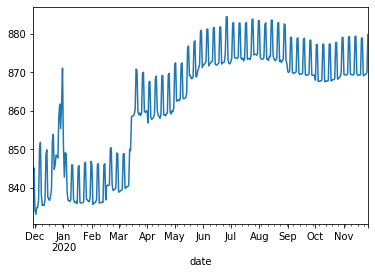

In [115]:
s.adjusted_price.plot();

Exploring price/guest_included, ie. price per person per night

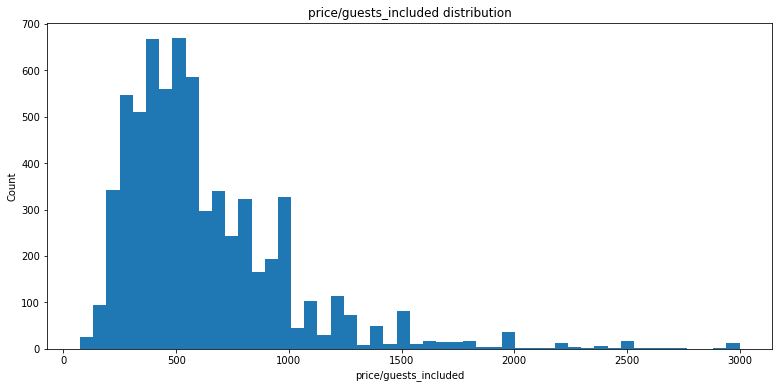

In [117]:
bins = 50
plt.subplots(figsize = [13,6])

plt.hist(df['price']/df['guests_included'], bins = bins)

plt.xlabel("price/guests_included")
plt.ylabel("Count")

plt.title("price/guests_included distribution");

Looks unimodal with a left-skew.


Proportions in percent:


neighbourhood_cleansed
Grünerløkka                     22.699666
Gamle Oslo                      19.131491
Frogner                         16.125114
St. Hanshaugen                  12.860613
Sagene                          10.977832
Nordstrand                       3.127847
Nordre Aker                      2.839356
Vestre Aker                      2.626784
Ullern                           1.943517
Østensjø                         1.882782
Sentrum                          1.624658
Alna                             1.320984
Bjerke                           1.153963
Søndre Nordstrand                0.850288
Grorud                           0.409961
Marka                            0.212572
Stovner                          0.212572

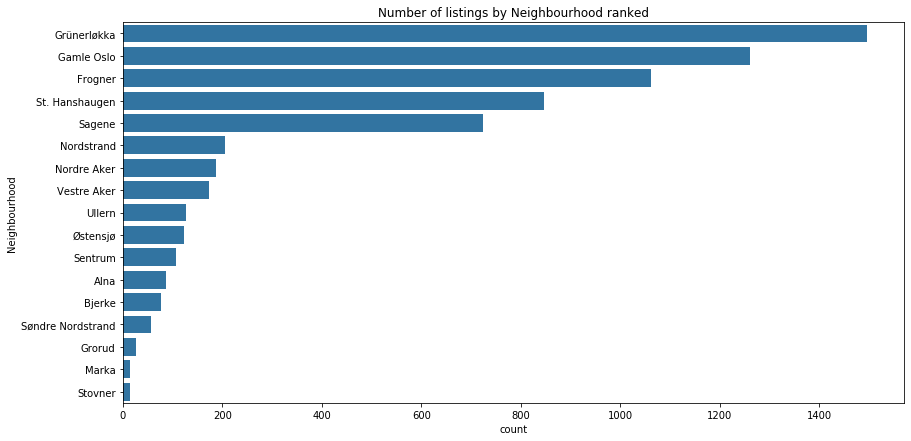

In [118]:
plt.subplots(figsize = [14,7])

sns.countplot(data = df, y = 'neighbourhood_cleansed', color = base_color, 
              order = df['neighbourhood_cleansed'].value_counts().index)

plt.ylabel('Neighbourhood')

plt.title("Number of listings by Neighbourhood ranked");

print('\nProportions in percent:')
pd.DataFrame(100*df['neighbourhood_cleansed'].value_counts()/df['neighbourhood_cleansed'].value_counts().sum())

We see that most of the listings are in the top 5 neighbourhoods.

A closer look at top 10 shows the same:

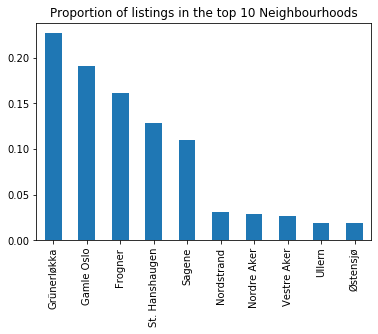

In [119]:
count_vals = pd.Series(df['neighbourhood_cleansed'].value_counts())

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Proportion of listings in the top 10 Neighbourhoods");


Proportions in percent:


bathrooms
1.0  88.672943
1.5   5.724264
2.0   4.221075
2.5   0.819921
0.0   0.227756
0.5   0.167021
3.0   0.075919
4.0   0.045551
4.5   0.030367
5.0   0.015184

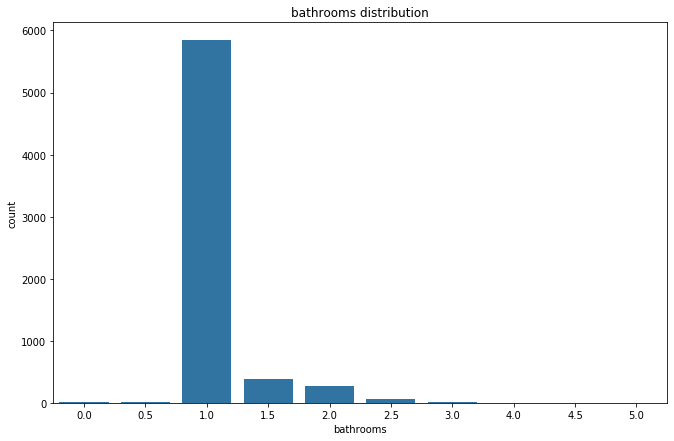

In [120]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'bathrooms', color = base_color);

plt.title("bathrooms distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['bathrooms'].value_counts()/df['bathrooms'].value_counts().sum())


Proportions in percent:


host_is_superhost
0.0          84.055328
1.0          15.944672

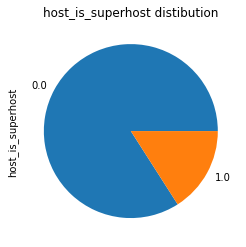

In [121]:
ax = df['host_is_superhost'].value_counts().plot(kind='pie')
ax.set_title('host_is_superhost distibution')

print('\nProportions in percent:')
pd.DataFrame(100*df['host_is_superhost'].value_counts()/df['host_is_superhost'].value_counts().sum())


Proportions in percent:


guests_included
1         66.383237
2         23.762527
4          5.056180
3          3.355603
5          0.698451
6          0.576981
7          0.060735
8          0.060735
10         0.030367
9          0.015184

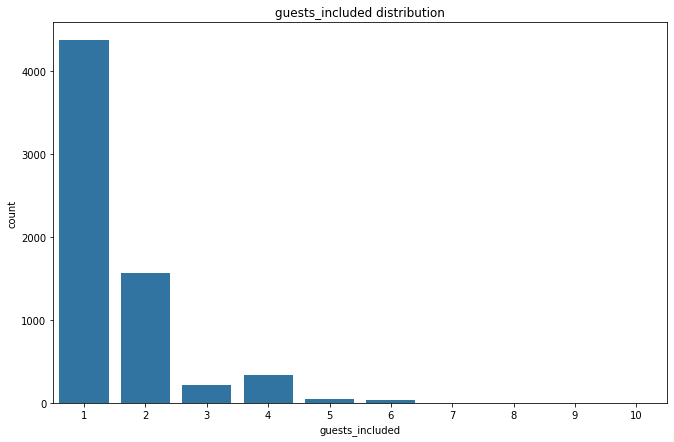

In [122]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'guests_included', color = base_color);

plt.title("guests_included distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['guests_included'].value_counts()/df['guests_included'].value_counts().sum())

In [123]:
df.guests_included.isna().sum()

0


Proportions in percent:


minimum_nights
2 days           37.792287
1 day            23.398117
3 days           18.114182
4 days            7.014880
5 days            5.542059
7 days            2.778621
15-30 days        1.685393
6 days            1.594291
8-14 days         1.488005
31 days+          0.592165

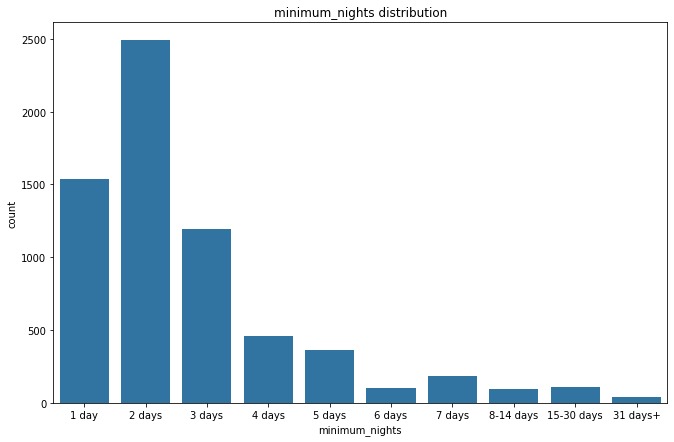

In [124]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'minimum_nights', color = base_color);

plt.title("minimum_nights distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['minimum_nights'].value_counts()/df['minimum_nights'].value_counts().sum())

In [125]:
counts = pd.DataFrame(df.groupby('neighbourhood_cleansed').count())
sums = pd.DataFrame(df.groupby('neighbourhood_cleansed').sum())
means = pd.DataFrame(df.groupby('neighbourhood_cleansed').mean())
medians = pd.DataFrame(df.groupby('neighbourhood_cleansed').median())

In [126]:
df.describe()

id  host_is_superhost  host_total_listings_count  \
count  6.586000e+03        6579.000000                6579.000000   
mean   2.067509e+07           0.159447                   1.783858   
std    1.051444e+07           0.366120                   2.833439   
min    4.293200e+04           0.000000                   0.000000   
25%    1.301291e+07           0.000000                   1.000000   
50%    2.004711e+07           0.000000                   1.000000   
75%    2.898653e+07           0.000000                   2.000000   
max    4.025576e+07           1.000000                  41.000000   

       host_has_profile_pic  host_identity_verified     latitude    longitude  \
count           6579.000000             6579.000000  6586.000000  6586.000000   
mean               0.998936                0.396109    59.921402    10.756832   
std                0.032604                0.489125     0.017798     0.036921   
min                0.000000                0.000000    59.823770    10.629550   
25%                1.000000                0.000000    59.913620    10.736543   
50%                1.000000                0.000000    59.922420    10.760980   
75%                1.000000                1.000000    59.929778    10.774007   
max                1.000000                1.000000    60.036680    10.944150   

       is_location_exact  accommodates    bathrooms     bedrooms         beds  \
count        6586.000000   6586.000000  6586.000000  6583.000000  6581.000000   
mean            0.747039      3.244306     1.084573     1.375968     1.869169   
std             0.434742      1.627866     0.289501     0.854189     1.290505   
min             0.000000      1.000000     0.000000     0.000000     0.000000   
25%             0.000000      2.000000     1.000000     1.000000     1.000000   
50%             1.000000      3.000000     1.000000     1.000000     1.000000   
75%             1.000000      4.000000     1.000000     2.000000     2.000000   
max             1.000000     16.000000     5.000000     8.000000    16.000000   

              price  cleaning_fee  guests_included  number_of_reviews  \
count   6586.000000   4960.000000      6586.000000        6586.000000   
mean     828.573034    314.202621         1.525053          23.029912   
std      498.022444    274.262712         0.945144          45.822955   
min       83.000000      0.000000         1.000000           1.000000   
25%      504.000000    150.000000         1.000000           3.000000   
50%      706.000000    252.000000         1.000000           8.000000   
75%      991.000000    450.000000         2.000000          22.000000   
max    11997.000000   5000.000000        10.000000         809.000000   

       number_of_reviews_ltm  first_review  last_review  review_scores_rating  \
count            6586.000000   6586.000000  6586.000000           6586.000000   
mean                7.837686   2017.247647  2018.299727             95.677801   
std                15.335882      1.505701     1.071785              6.320884   
min                 0.000000   2011.000000  2013.000000             20.000000   
25%                 0.000000   2016.000000  2018.000000             94.000000   
50%                 2.000000   2017.000000  2019.000000             98.000000   
75%                 8.000000   2019.000000  2019.000000            100.000000   
max               143.000000   2019.000000  2019.000000            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             6586.000000                6586.000000   
mean                 9.751442                   9.523231   
std                  0.653489                   0.869717   
min                  2.000000                   2.000000   
25%                 10.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

      

In [127]:
relevant_nums = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'instant_bookable', 'reviews_per_month', 
                 'host_is_superhost']
relevant_cats = ['property_type', 'minimum_nights']

In [128]:
df.groupby('neighbourhood_cleansed').sum()

id  host_is_superhost  \
neighbourhood_cleansed                                   
Alna                     1875511288               12.0   
Bjerke                   1645862946                8.0   
Frogner                 21784173622              201.0   
Gamle Oslo              26325709422              227.0   
Grorud                    742483428                5.0   
Grünerløkka             30590020391              223.0   
Marka                     314143155                3.0   
Nordre Aker              3768168910               26.0   
Nordstrand               4382273872               45.0   
Sagene                  14627676762               79.0   
Sentrum                  2308470050               27.0   
St. Hanshaugen          17020294191              121.0   
Stovner                   357972930                1.0   
Søndre Nordstrand        1251920044               11.0   
Ullern                   2731602107               17.0   
Vestre Aker              3724230200               25.0   
Østensjø                 2715632388               18.0   

                        host_total_listings_count  host_has_profile_pic  \
neighbourhood_cleansed                                                    
Alna                                        109.0                  86.0   
Bjerke                                       95.0                  76.0   
Frogner                                    2094.0                1062.0   
Gamle Oslo                                 2681.0                1258.0   
Grorud                                       33.0                  27.0   
Grünerløkka                                2915.0                1491.0   
Marka                                        22.0                  14.0   
Nordre Aker                                 257.0                 187.0   
Nordstrand                                  278.0                 205.0   
Sagene                                      888.0                 722.0   
Sentrum                                     192.0                 107.0   
St. Hanshaugen                             1320.0                 845.0   
Stovner                                      12.0                  14.0   
Søndre Nordstrand                            85.0                  55.0   
Ullern                                      156.0                 128.0   
Vestre Aker                                 422.0                 172.0   
Østensjø                                    177.0                 123.0   

                        host_identity_verified     latitude    longitude  \
neighbourhood_cleansed                                                     
Alna                                      30.0   5213.36442    944.48899   
Bjerke                                    27.0   4555.68128    822.83597   
Frogner                                  392.0  63635.40625  11381.74588   
Gamle Oslo                               547.0  75486.34306  13574.27232   
Grorud                                     6.0   1618.88166    293.68175   
Grünerløkka                              648.0  89587.05146  16096.31313   
Marka                                      4.0    839.18614    151.24478   
Nordre Aker                               64.0  11211.17773   2013.09541   
Nordstrand                                69.0  12334.35122   2223.88175   
Sagene                                   310.0  43334.66973   7782.34547   
Sentrum                                   33.0   6410.59332   1149.56642   
St. Hanshaugen                           326.0  50756.48100   9097.83955   
Stovner                                    0.0    839.34873    152.91573   
Søndre Nordstrand                         20.0   3350.92077    605.19615   
Ullern                                    33.0   7670.66831   1365.45081   
Vestre Aker                               62.0  10371.58243   1846.25764   
Østensjø                                  35.0   7426.64292   1343.36238   

                        is_location_exact  accommodates  ba

In [129]:
cols_of_interest = ['price', 'guests_included', 'host_is_superhost', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
       'review_scores_value', 'bathrooms', 'bedrooms', 'instant_bookable', 'reviews_per_month']
df_test = pd.DataFrame(means[cols_of_interest])
df_test

price  guests_included  host_is_superhost  \
neighbourhood_cleansed                                                    
Alna                     514.712644         1.574713           0.137931   
Bjerke                   618.868421         1.552632           0.105263   
Frogner                  925.365348         1.530132           0.189266   
Gamle Oslo               831.713492         1.502381           0.180445   
Grorud                   573.370370         1.296296           0.185185   
Grünerløkka              793.437458         1.486288           0.149464   
Marka                   1021.428571         1.857143           0.214286   
Nordre Aker              828.117647         1.663102           0.139037   
Nordstrand               946.300971         1.757282           0.218447   
Sagene                   718.896266         1.495159           0.109267   
Sentrum                 1027.654206         1.532710           0.252336   
St. Hanshaugen           862.212515         1.514758           0.143026   
Stovner                  795.285714         1.357143           0.071429   
Søndre Nordstrand        632.678571         1.750000           0.196429   
Ullern                   934.359375         1.539062           0.132812   
Vestre Aker              907.815029         1.514451           0.144509   
Østensjø                 689.322581         1.701613           0.146341   

                        number_of_reviews  review_scores_rating  \
neighbourhood_cleansed                                            
Alna                            15.206897             94.482759   
Bjerke                          14.671053             94.802632   
Frogner                         29.752354             95.025424   
Gamle Oslo                      27.246825             95.776190   
Grorud                          10.888889             95.666667   
Grünerløkka                     23.064883             96.050167   
Marka                           13.714286             95.857143   
Nordre Aker                     15.513369             95.957219   
Nordstrand                      23.582524             96.461165   
Sagene                          13.401107             96.059474   
Sentrum                         44.859813             95.065421   
St. Hanshaugen                  21.195986             95.279811   
Stovner                         17.000000             92.928571   
Søndre Nordstrand               22.000000             95.160714   
Ullern                          14.500000             95.968750   
Vestre Aker                     17.473988             95.797688   
Østensjø                        14.443548             96.508065   

                        review_scores_accuracy  review_scores_cleanliness  \
neighbourhood_cleansed                                                      
Alna                                  9.643678                   9.436782   
Bjerke                                9.684211                   9.473684   
Frogner                               9.692090                   9.491525   
Gamle Oslo                            9.761111                   9.528571   
Grorud                                9.777778                   9.444444   
Grünerløkka                           9.785953                   9.551839   
Marka                                 9.857143                   9.428571   
Nordre Aker                           9.695187                   9.588235   
Nordstrand                            9.839806                   9.635922   
Sagene                                9.767635                   9.550484   
Sentrum                               9.831776                   9.420561   
St. Hanshaugen                        9.734357                   9.462810   
Stovner                               9.785714                   9.642857   
Søndre Nordstrand                     9.732143                   9.553571   
Ullern                                9.820312                   9.539062   
Vestre Aker          

In [130]:
g = pd.DataFrame(df_test).reset_index(drop=True)

In [131]:
df_geo = df_geo.sort_values('neighbourhood').reset_index(drop=True)

In [132]:
df_geo_full = pd.concat([df_geo, g], axis=1)

In [133]:
df_geo_full['price_per_guest'] = df_geo_full['price']/ df_geo_full['guests_included']

In [134]:
unique_guests_included_values = list(df.guests_included.value_counts().index.sort_values())

df.groupby('guests_included')['price'].mean()/unique_guests_included_values

guests_included
1     743.390210
2     426.066134
3     367.920060
4     349.729730
5     293.826087
6     273.644737
7     253.892857
8     238.750000
9     144.666667
10    875.000000
Name: price, dtype: float64

In [135]:
df.guests_included.value_counts()

1     4372
2     1565
4      333
3      221
5       46
6       38
7        4
8        4
10       2
9        1
Name: guests_included, dtype: int64

In [136]:
df.loc[df.guests_included == 9]

id host_response_time host_response_rate  host_is_superhost  \
568  4569091      not specified                NaN                0.0   

     host_total_listings_count  host_has_profile_pic  host_identity_verified  \
568                        1.0                   1.0                     1.0   

    neighbourhood_cleansed  latitude  longitude  is_location_exact  \
568                   Alna   59.9344   10.89038                  1   

    property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
568         House  Entire home/apt            10        2.0       4.0   9.0   

                                             amenities   price  \
568  {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...  1302.0   

    security_deposit  cleaning_fee  guests_included minimum_nights  \
568            $0.00           0.0                9         5 days   

     number_of_reviews  number_of_reviews_ltm  first_review  last_review  \
568                  7                      1        2016.0       2019.0   

     review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
568                  97.0                    10.0                        8.0   

     review_scores_checkin  review_scores_communication  \
568                   10.0                         10.0   

     review_scores_location  review_scores_value  instant_bookable  \
568                     9.0                 10.0                 0   

    cancellation_policy  require_guest_profile_picture  \
568            moderate                              0   

     require_guest_phone_verification  calculated_host_listings_count  \
568                                 0                               1   

     reviews_per_month  review_range_days  host_since_year  latbin  lonbin  \
568                0.2                3.0           2014.0  59.925  10.875   

    hot_sectors  wifi  kitchen  heating  essentials  smoke_detector  washer  \
568     not_hot   1.0      1.0      1.0         1.0             1.0     1.0   

     fire_extinguisher   tv  hangers  iron  elevator  bed_linens  \
568                1.0  1.0      1.0   1.0       0.0         0.0   

     indoor_fireplace  free_parking_on_premises  lock_on_bedroom_door  \
568               1.0                       1.0                   0.0   

     patio_or_balcony  garden_or_backyard  bbq_grill  smart_lock  breakfast  \
568               1.0                 1.0        0.0         0.0        0.0   

     air_conditioning  gym  pool  
568               0.0  0.0   0.0

In [137]:
df_geo_full.head(3)

neighbourhood                                           geometry  \
0          Alna  MULTIPOLYGON (((10.80798 59.92224, 10.80965 59...   
1        Bjerke  MULTIPOLYGON (((10.78661 59.93823, 10.78860 59...   
2       Frogner  MULTIPOLYGON (((10.64777 59.90941, 10.67810 59...   

        price  guests_included  host_is_superhost  number_of_reviews  \
0  514.712644         1.574713           0.137931          15.206897   
1  618.868421         1.552632           0.105263          14.671053   
2  925.365348         1.530132           0.189266          29.752354   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0             94.482759                9.643678                   9.436782   
1             94.802632                9.684211                   9.473684   
2             95.025424                9.692090                   9.491525   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0               9.655172                     9.724138                9.160920   
1               9.776316                     9.789474                9.434211   
2               9.742938                     9.798493                9.889831   

   review_scores_value  bathrooms  bedrooms  instant_bookable  \
0             9.459770   1.086207  1.310345          0.333333   
1             9.552632   1.085526  1.565789          0.434211   
2             9.552731   1.094633  1.294727          0.369115   

   reviews_per_month  price_per_guest  
0           0.967356       326.861314  
1           0.940395       398.593220  
2           1.261723       604.761846

C:\Anaconda3\envs\dand\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\envs\dand\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


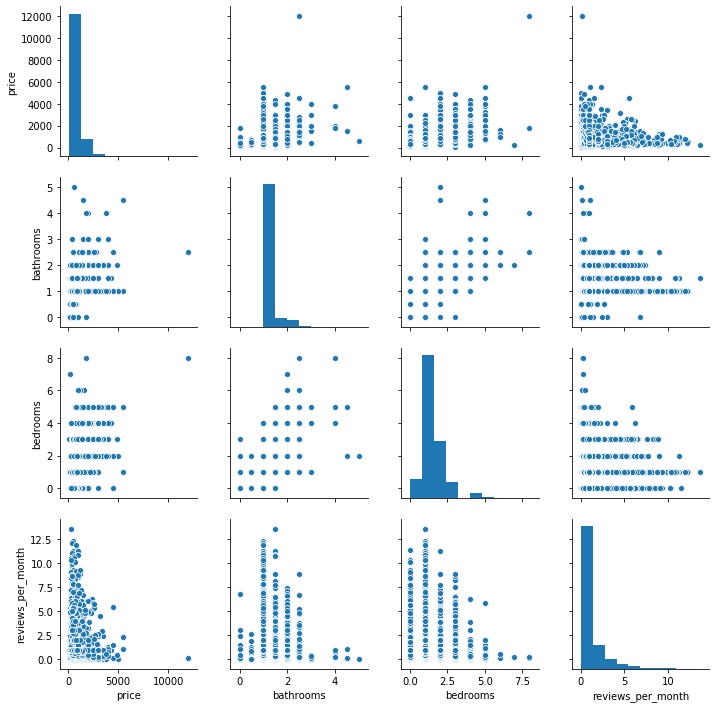

In [138]:
#'latitude', 'longitude', 'bathrooms', 'bedrooms', 'instant_bookable', 'reviews_per_month', 'host_is_superhost'
sns.pairplot(df[['price', 'bathrooms', 'bedrooms', 'reviews_per_month']]);

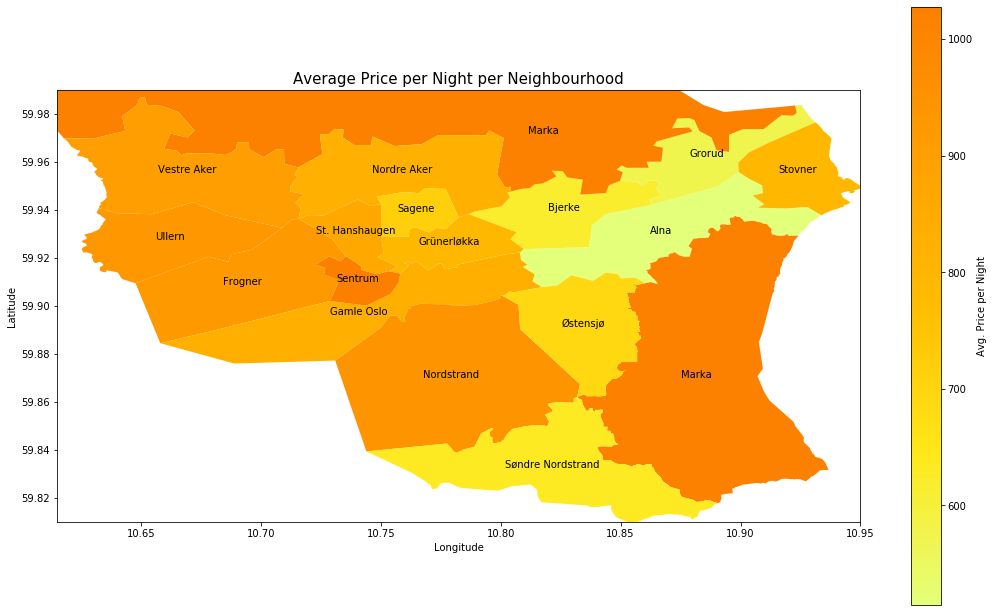

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='price', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. Price per Night", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average Price per Night per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

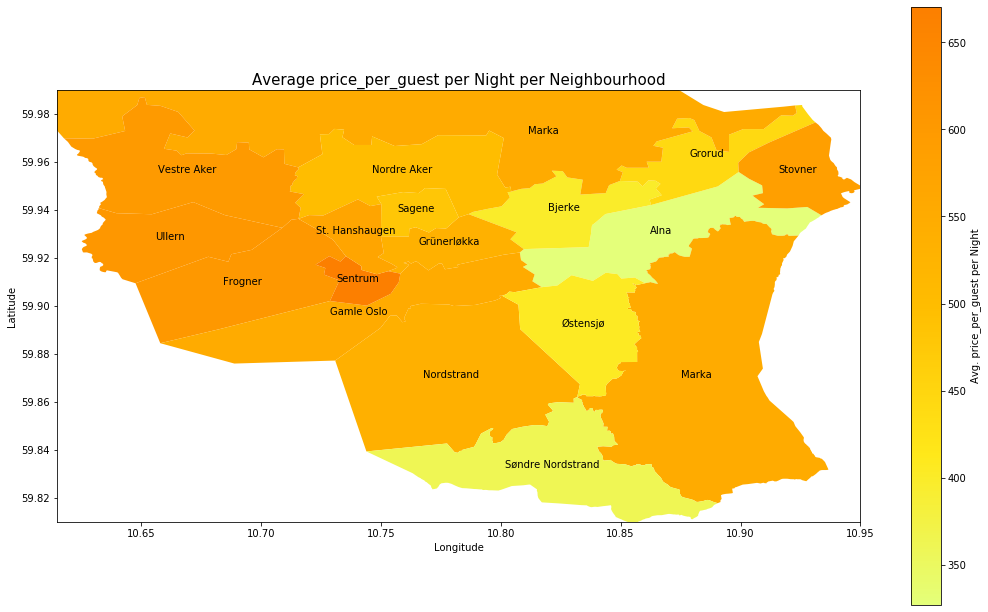

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='price_per_guest', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. price_per_guest per Night", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average price_per_guest per Night per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

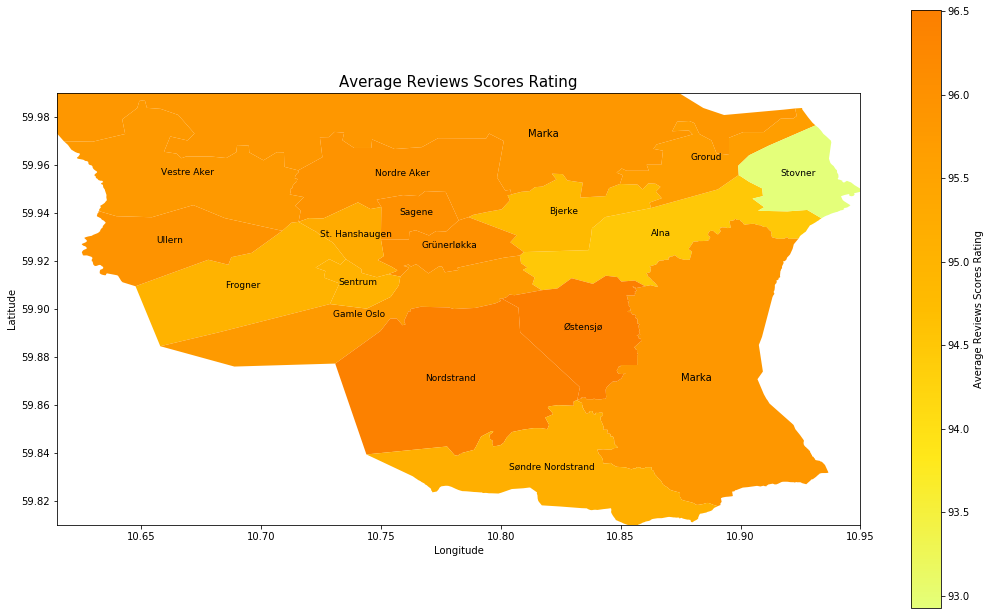

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='review_scores_rating', ax=ax, legend=True, 
                 cmap='Wistia', 
                 legend_kwds={'label': "Average Reviews Scores Rating", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average Reviews Scores Rating',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center', fontsize=9)

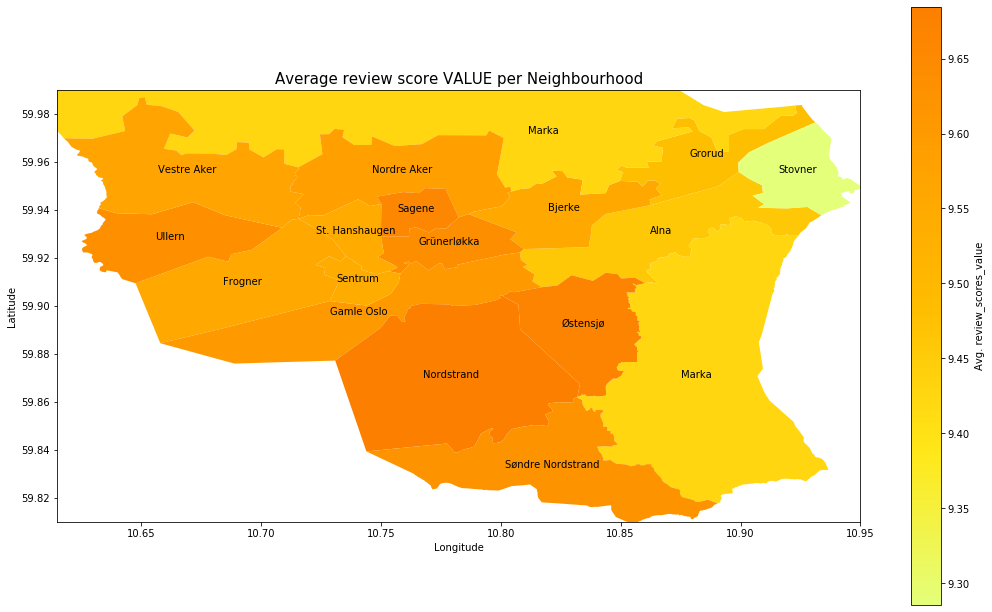

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='review_scores_value', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. review_scores_value", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average review score VALUE per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

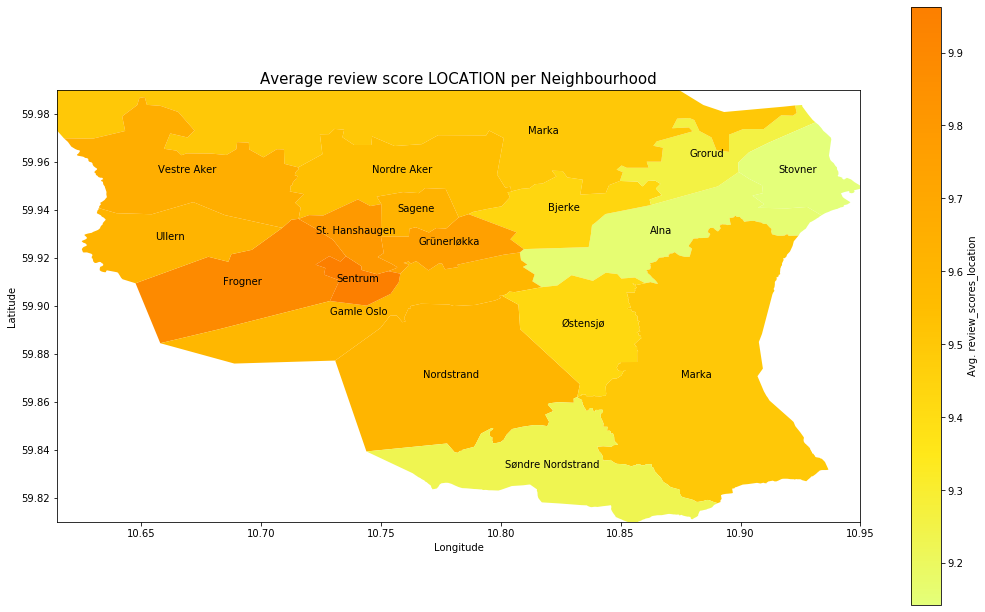

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='review_scores_location', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. review_scores_location", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average review score LOCATION per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

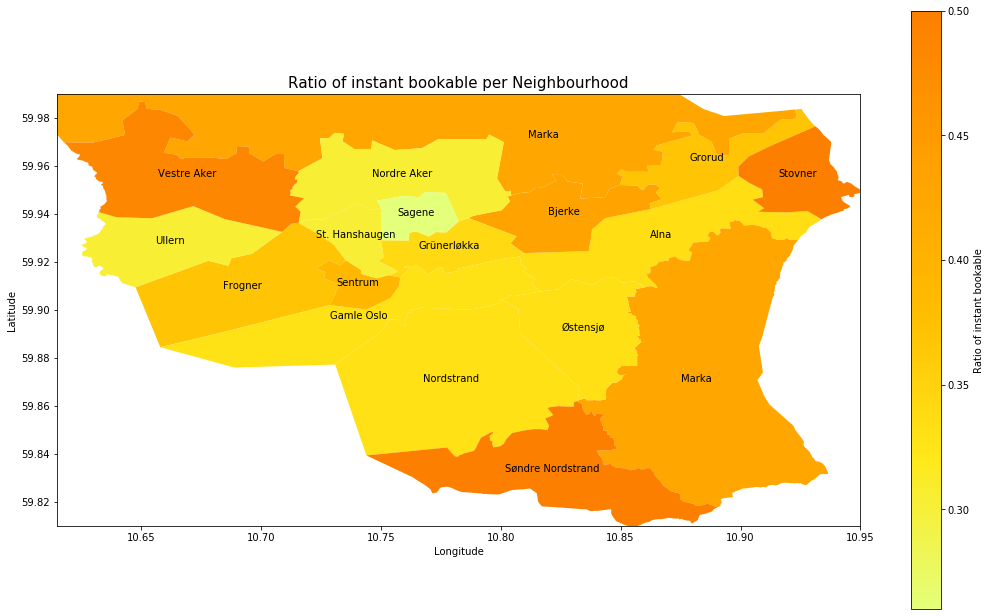

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='instant_bookable', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Ratio of instant bookable", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Ratio of instant bookable per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

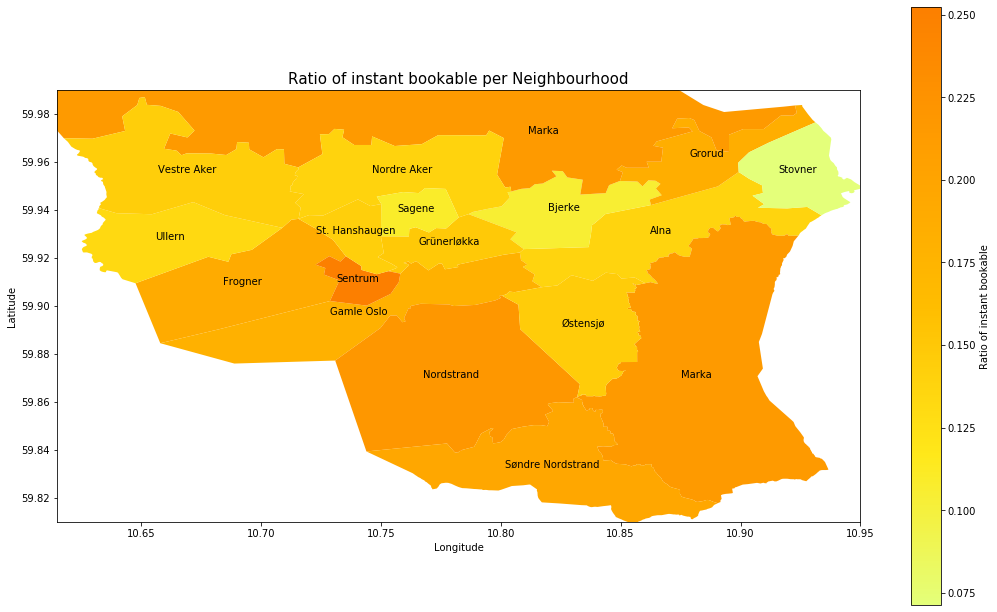

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='host_is_superhost', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Ratio of instant bookable", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Ratio of instant bookable per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

In [146]:
df.price.mean()

828.5730337078652

In [147]:
mylist1 = list(df.neighbourhood_cleansed.value_counts()[:10].index)

df_top10 = df[df['neighbourhood_cleansed'].isin(mylist1)]

mylist2 = list(df.neighbourhood_cleansed.value_counts()[:5].index)

df_top5 = df[df['neighbourhood_cleansed'].isin(mylist2)]

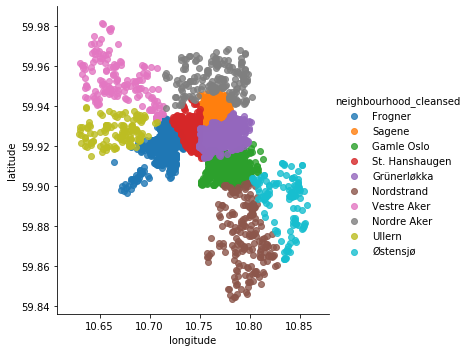

In [148]:
sns.lmplot('longitude', 'latitude', data=df_top10, hue='neighbourhood_cleansed', fit_reg=False)

plt.show()

In [149]:
df.select_dtypes(include=['float', 'int'])

host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                   0.0                        1.0                   1.0   
1                   1.0                        2.0                   1.0   
2                   0.0                        2.0                   1.0   
3                   0.0                        1.0                   1.0   
4                   0.0                        1.0                   1.0   
...                 ...                        ...                   ...   
8529                0.0                        0.0                   0.0   
8538                0.0                        0.0                   1.0   
8541                1.0                        1.0                   1.0   
8545                0.0                        0.0                   1.0   
8546                0.0                        0.0                   1.0   

      host_identity_verified  latitude  longitude  bathrooms  bedrooms  beds  \
0                        0.0  59.91234   10.72384        1.0       2.0   3.0   
1                        0.0  59.91839   10.71457        0.5       1.0   1.0   
2                        0.0  59.93898   10.77360        1.0       1.0   1.0   
3                        1.0  59.90611   10.78000        1.0       1.0   2.0   
4                        1.0  59.92478   10.71649        1.5       3.0   0.0   
...                      ...       ...        ...        ...       ...   ...   
8529                     0.0  59.97099   10.66884        1.0       1.0   2.0   
8538                     0.0  59.92020   10.74931        1.0       1.0   1.0   
8541                     1.0  59.91954   10.71280        1.0       1.0   1.0   
8545                     0.0  59.92815   10.79578        2.0       5.0   6.0   
8546                     0.0  59.90672   10.76078        1.0       1.0   1.0   

       price  cleaning_fee  first_review  last_review  review_scores_rating  \
0     2000.0         300.0        2013.0       2019.0                  97.0   
1      385.0         101.0        2015.0       2019.0                  97.0   
2     1009.0         550.0        2011.0       2013.0                  94.0   
3      504.0         252.0        2011.0       2019.0                  95.0   
4     1917.0           NaN        2011.0       2018.0                  98.0   
...      ...           ...           ...          ...                   ...   
8529   596.0           0.0        2019.0       2019.0                 100.0   
8538   596.0         100.0        2019.0       2019.0                 100.0   
8541   798.0         375.0        2019.0       2019.0                 100.0   
8545   798.0         200.0        2019.0       2019.0                 100.0   
8546   853.0         300.0        2019.0       2019.0                 100.0   

      review_scores_accuracy  review_scores_cleanliness  \
0                       10.0                       10.0   
1                       10.0                       10.0   
2                        9.0                        9.0   
3                        9.0                       10.0   
4                       10.0                       10.0   
...                      ...                        ...   
8529                    10.0                       10.0   
8538                    10.0                       10.0   
8541                     8.0                        8.0   
8545                    10.0                       10.0   
8546                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
0                      10.0                         10.0   
1                      10.0                         10.0   
2                      10.0                         10.0   
3                      10.0                         10.0   
4                      10.0                         10.0   
...                     ...                          ...   
8529                   10.0                         10

In [150]:
def prepare_variables(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no Prices
    2. Create X as all the columns that are not the Price column
    3. Create y as the Price column
    4. Drop the Price column from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Drop rows with missing price values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']

    #Drop price columns
    X = df.drop(['price'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = X.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = X.select_dtypes(include=['category']).copy().columns
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    return X, y
    
    

In [151]:
df.select_dtypes(include=['float', 'int'])

host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                   0.0                        1.0                   1.0   
1                   1.0                        2.0                   1.0   
2                   0.0                        2.0                   1.0   
3                   0.0                        1.0                   1.0   
4                   0.0                        1.0                   1.0   
...                 ...                        ...                   ...   
8529                0.0                        0.0                   0.0   
8538                0.0                        0.0                   1.0   
8541                1.0                        1.0                   1.0   
8545                0.0                        0.0                   1.0   
8546                0.0                        0.0                   1.0   

      host_identity_verified  latitude  longitude  bathrooms  bedrooms  beds  \
0                        0.0  59.91234   10.72384        1.0       2.0   3.0   
1                        0.0  59.91839   10.71457        0.5       1.0   1.0   
2                        0.0  59.93898   10.77360        1.0       1.0   1.0   
3                        1.0  59.90611   10.78000        1.0       1.0   2.0   
4                        1.0  59.92478   10.71649        1.5       3.0   0.0   
...                      ...       ...        ...        ...       ...   ...   
8529                     0.0  59.97099   10.66884        1.0       1.0   2.0   
8538                     0.0  59.92020   10.74931        1.0       1.0   1.0   
8541                     1.0  59.91954   10.71280        1.0       1.0   1.0   
8545                     0.0  59.92815   10.79578        2.0       5.0   6.0   
8546                     0.0  59.90672   10.76078        1.0       1.0   1.0   

       price  cleaning_fee  first_review  last_review  review_scores_rating  \
0     2000.0         300.0        2013.0       2019.0                  97.0   
1      385.0         101.0        2015.0       2019.0                  97.0   
2     1009.0         550.0        2011.0       2013.0                  94.0   
3      504.0         252.0        2011.0       2019.0                  95.0   
4     1917.0           NaN        2011.0       2018.0                  98.0   
...      ...           ...           ...          ...                   ...   
8529   596.0           0.0        2019.0       2019.0                 100.0   
8538   596.0         100.0        2019.0       2019.0                 100.0   
8541   798.0         375.0        2019.0       2019.0                 100.0   
8545   798.0         200.0        2019.0       2019.0                 100.0   
8546   853.0         300.0        2019.0       2019.0                 100.0   

      review_scores_accuracy  review_scores_cleanliness  \
0                       10.0                       10.0   
1                       10.0                       10.0   
2                        9.0                        9.0   
3                        9.0                       10.0   
4                       10.0                       10.0   
...                      ...                        ...   
8529                    10.0                       10.0   
8538                    10.0                       10.0   
8541                     8.0                        8.0   
8545                    10.0                       10.0   
8546                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
0                      10.0                         10.0   
1                      10.0                         10.0   
2                      10.0                         10.0   
3                      10.0                         10.0   
4                      10.0                         10.0   
...                     ...                          ...   
8529                   10.0                         10

In [152]:
df_merged.columns

Index(['listing_id', 'date', 'adjusted_price', 'id', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month',
       'review_range_days', 'host_sinc

In [153]:
df_merged.select_dtypes(include=['float', 'int'])

adjusted_price  host_is_superhost  host_total_listings_count  \
0                1990.0                0.0                        1.0   
1                1990.0                0.0                        1.0   
2                1990.0                0.0                        1.0   
3                1990.0                0.0                        1.0   
4                1990.0                0.0                        1.0   
...                 ...                ...                        ...   
2403885           780.0                0.0                        0.0   
2403886           780.0                0.0                        0.0   
2403887           780.0                0.0                        0.0   
2403888           780.0                0.0                        0.0   
2403889           780.0                0.0                        0.0   

         host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                         1.0                     1.0  59.91870   10.71094   
1                         1.0                     1.0  59.91870   10.71094   
2                         1.0                     1.0  59.91870   10.71094   
3                         1.0                     1.0  59.91870   10.71094   
4                         1.0                     1.0  59.91870   10.71094   
...                       ...                     ...       ...        ...   
2403885                   1.0                     0.0  59.90672   10.76078   
2403886                   1.0                     0.0  59.90672   10.76078   
2403887                   1.0                     0.0  59.90672   10.76078   
2403888                   1.0                     0.0  59.90672   10.76078   
2403889                   1.0                     0.0  59.90672   10.76078   

         bathrooms  bedrooms  beds   price  cleaning_fee  first_review  \
0              1.0       3.0   3.0  1009.0         800.0        2016.0   
1              1.0       3.0   3.0  1009.0         800.0        2016.0   
2              1.0       3.0   3.0  1009.0         800.0        2016.0   
3              1.0       3.0   3.0  1009.0         800.0        2016.0   
4              1.0       3.0   3.0  1009.0         800.0        2016.0   
...            ...       ...   ...     ...           ...           ...   
2403885        1.0       1.0   1.0   853.0         300.0        2019.0   
2403886        1.0       1.0   1.0   853.0         300.0        2019.0   
2403887        1.0       1.0   1.0   853.0         300.0        2019.0   
2403888        1.0       1.0   1.0   853.0         300.0        2019.0   
2403889        1.0       1.0   1.0   853.0         300.0        2019.0   

         last_review  review_scores_rating  review_scores_accuracy  \
0             2019.0                  96.0                    10.0   
1             2019.0                  96.0                    10.0   
2             2019.0                  96.0                    10.0   
3             2019.0                  96.0                    10.0   
4             2019.0                  96.0                    10.0   
...              ...                   ...                     ...   
2403885       2019.0                 100.0                    10.0   
2403886       2019.0                 100.0                    10.0   
2403887       2019.0                 100.0                    10.0   
2403888       2019.0                 100.0                    10.0   
2403889       2019.0                 100.0                    10.0   

         review_scores_cleanliness  review_scores_checkin  \
0                              9.0                   10.0   
1                              9.0                   10.0   
2                              9.0                   10.0   
3                              9.0                   10.0   
4                              9.0                   10.0   
...                            ...                    ...   
2403885                       10.0    

In [154]:
df_merged.select_dtypes(include=['category'])

host_response_time property_type        room_type minimum_nights  \
0             within a day     Apartment  Entire home/apt         2 days   
1             within a day     Apartment  Entire home/apt         2 days   
2             within a day     Apartment  Entire home/apt         2 days   
3             within a day     Apartment  Entire home/apt         2 days   
4             within a day     Apartment  Entire home/apt         2 days   
...                    ...           ...              ...            ...   
2403885     within an hour     Apartment  Entire home/apt         2 days   
2403886     within an hour     Apartment  Entire home/apt         2 days   
2403887     within an hour     Apartment  Entire home/apt         2 days   
2403888     within an hour     Apartment  Entire home/apt         2 days   
2403889     within an hour     Apartment  Entire home/apt         2 days   

                 cancellation_policy  
0        strict_14_with_grace_period  
1        strict_14_with_grace_period  
2        strict_14_with_grace_period  
3        strict_14_with_grace_period  
4        strict_14_with_grace_period  
...                              ...  
2403885                     flexible  
2403886                     flexible  
2403887                     flexible  
2403888                     flexible  
2403889                     flexible  

[2403890 rows x 5 columns]

In [155]:
df_merged.select_dtypes(include=['object'])

host_response_rate neighbourhood_cleansed  \
0                     100%                Frogner   
1                     100%                Frogner   
2                     100%                Frogner   
3                     100%                Frogner   
4                     100%                Frogner   
...                    ...                    ...   
2403885               100%             Gamle Oslo   
2403886               100%             Gamle Oslo   
2403887               100%             Gamle Oslo   
2403888               100%             Gamle Oslo   
2403889               100%             Gamle Oslo   

                                                 amenities security_deposit  \
0        {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...        $3,000.00   
1        {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...        $3,000.00   
2        {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...        $3,000.00   
3        {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...        $3,000.00   
4        {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...        $3,000.00   
...                                                    ...              ...   
2403885  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...            $0.00   
2403886  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...            $0.00   
2403887  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...            $0.00   
2403888  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...            $0.00   
2403889  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...            $0.00   

        latbin lonbin hot_sectors  
0         59.9   10.7   59.9_10.7  
1         59.9   10.7   59.9_10.7  
2         59.9   10.7   59.9_10.7  
3         59.9   10.7   59.9_10.7  
4         59.9   10.7   59.9_10.7  
...        ...    ...         ...  
2403885   59.9  10.75  59.9_10.75  
2403886   59.9  10.75  59.9_10.75  
2403887   59.9  10.75  59.9_10.75  
2403888   59.9  10.75  59.9_10.75  
2403889   59.9  10.75  59.9_10.75  

[2403890 rows x 7 columns]

In [156]:
df_merged.drop(['latbin', 'lonbin'], axis=1, inplace=True)

In [157]:
df_merged = df_merged.drop(['amenities'], axis=1)

In [158]:
df_merged = df_merged.drop(['host_response_time'], axis=1)

In [159]:
df_merged = df_merged.drop(['latitude', 'longitude', 'bedrooms', 'beds', 'first_review', 'last_review', 'review_scores_rating', 'review_range_days', 'host_since_year'], axis=1)

In [160]:
df_merged = df_merged.drop(['host_has_profile_pic', 'review_scores_location'], axis=1)

In [161]:
df_merged = df_merged.drop(['review_scores_accuracy', 'review_scores_cleanliness'], axis=1)

In [162]:
df_merged = df_merged.drop(['lock_on_bedroom_door', 'heating'], axis=1)

In [163]:
X, y = prepare_variables(df_merged)

In [164]:
X = X.select_dtypes(include=['float', 'int'])

In [165]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


In [171]:
cutoffs = [1000000, 500000, 300000, 150000, 75000, 30000, 15000, 10000]

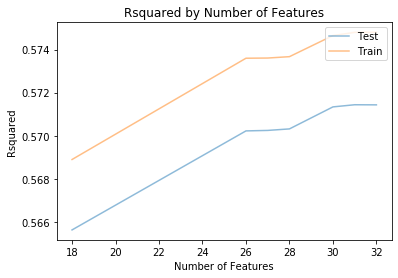

In [172]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [173]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

est_int       coefs   abs_coefs
4                   bathrooms  174.302877  174.302877
21           indoor_fireplace   76.278016   76.278016
27           air_conditioning   75.714558   75.714558
16                         tv   54.663347   54.663347
28                        gym  -37.646117   37.646117
19                   elevator   36.748162   36.748162
18                       iron   31.519516   31.519516
11                    kitchen   28.693640   28.693640
14                     washer   23.500153   23.500153
23           patio_or_balcony   20.008257   20.008257
13             smoke_detector  -16.974190   16.974190
25                  bbq_grill   14.188051   14.188051
29             is_peak_season  -13.591099   13.591099
12                 essentials  -12.149004   12.149004
8         review_scores_value  -11.860870   11.860870
3      host_identity_verified   11.644602   11.644602
9           reviews_per_month  -11.270563   11.270563
2   host_total_listings_count    8.249343    8.249343
1           host_is_superhost   -5.082501    5.082501
30                 is_weekend   -4.027147    4.027147

In [271]:
x = pd.DataFrame(df.neighbourhood_cleansed.value_counts() > 100)
y = list(x[x.neighbourhood_cleansed == True].index)

In [272]:
df.neighbourhood_cleansed.isin(y).sum()

6312

In [273]:
df_test = df[df.neighbourhood_cleansed.isin(y)]


plt.figure(figsize=(14,8))
sns.scatterplot(df_test.longitude,df_test.latitude,hue=df_test.neighbourhood_cleansed, palette = 'muted');

AttributeError: 'DataFrame' object has no attribute 'longitude'

<Figure size 1008x576 with 0 Axes>

In [ ]:
df.groupby('neighbourhood_cleansed').mean()

In [ ]:
df_test.price.hist(bins=100)

In [ ]:
df_test.price.mean()

In [ ]:
df_test.describe()

In [ ]:
df_test.hist(figsize=(18, 15), bins=20, grid=False, layout=(7, 6))
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.97, 0.97])

In [ ]:
df.neighbourhood_cleansed.value_counts()

In [ ]:
df.loc[:, df.columns.str.endswith('_cleansed')]

- Come up with three questions you are interested in answering.
- Extract the necessary data to answer these questions.
- Perform necessary cleaning, analysis, and modeling.
- Evaluate your results.